# Setting Up

In [1]:
options(digits = 3)

Sys.setenv(LANG = "en")

library(haven)
library(JWileymisc)
library(ggplot2)
library(ggpubr)
library(visreg)
library(survey)
library(tidyverse)
library(dplyr)
library(ggExtra)
library(psych)
library(ggthemes)
library(scales)
library(olsrr)
library(modelsummary)
library(marginaleffects)
library(tidyverse)
library(betareg)
library(brms)
library(corrplot)
library(BayesFactor)

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following object is masked from ‘package:JWileymisc’:

    cor2c

In [2]:
# read in data
setwd('/home/pavgreen/Documents/LRGS/EEG/alt/study')

db <- as.data.frame(read_csv("mind.csv"))

Rows: 45 Columns: 88
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): When is your date of birth?, Which sex were you assigned at birth?...
dbl (81): Please enter your participant number, Please rate each of the foll...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Demographic

## Age

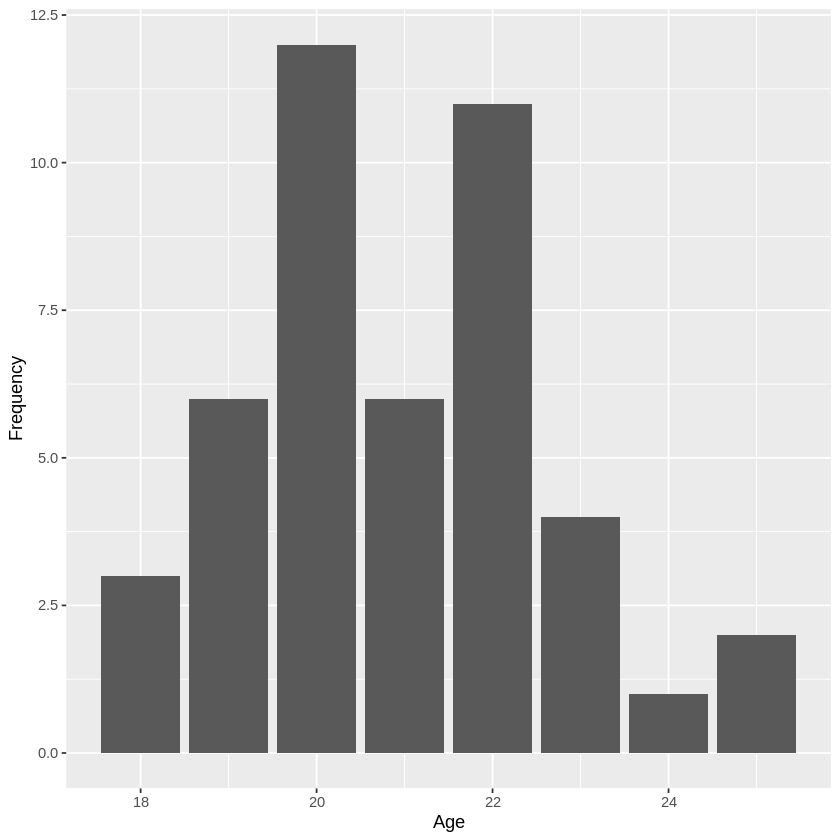

In [3]:
db %>%
    select(c(1:4)) %>%
        mutate(Age = floor(time_length(difftime(Sys.Date(), dmy(db[[2]])), "years"))) %>%
            ggplot(aes(Age)) +
                geom_bar() +
                    ylab("Frequency")

## Sex and Gender

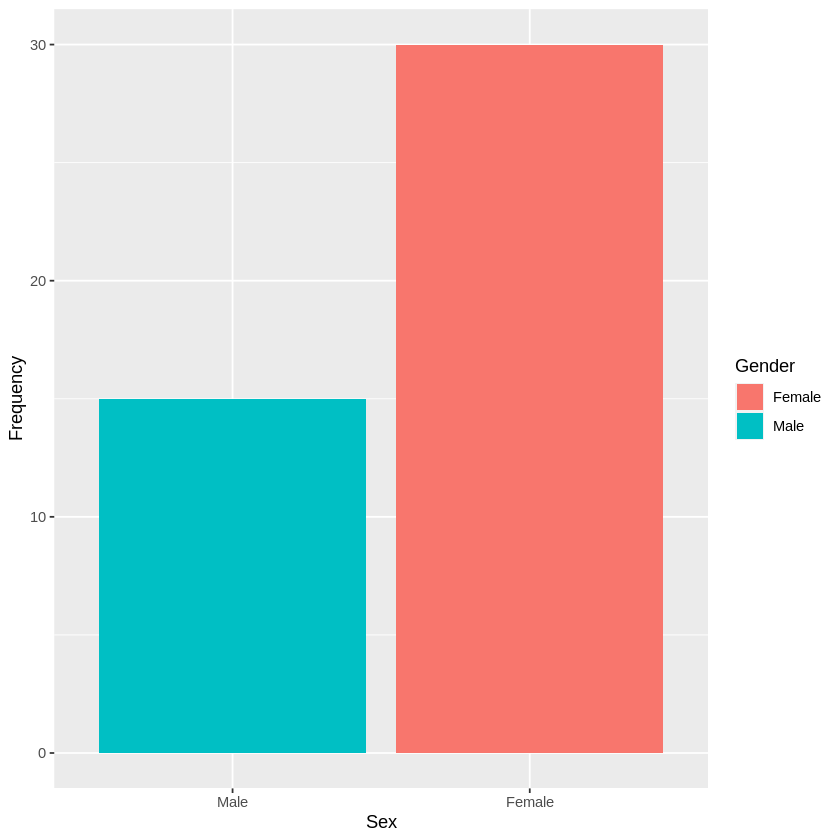

In [4]:
db %>% 
    select(c(1, 3, 4)) %>%
        mutate(Sex = factor(db[[3]], levels = c("Male", "Female")), Gender = factor(db[[4]])) %>%
            ggplot(aes(Sex, fill = Gender)) +
                geom_bar() +
                    ylab("Frequency")

db <- db %>% mutate(Sex = ifelse(db[[3]] == 'Female', 1L, 0L))

sex <- db[["Sex"]]

## Mindfulness Experience

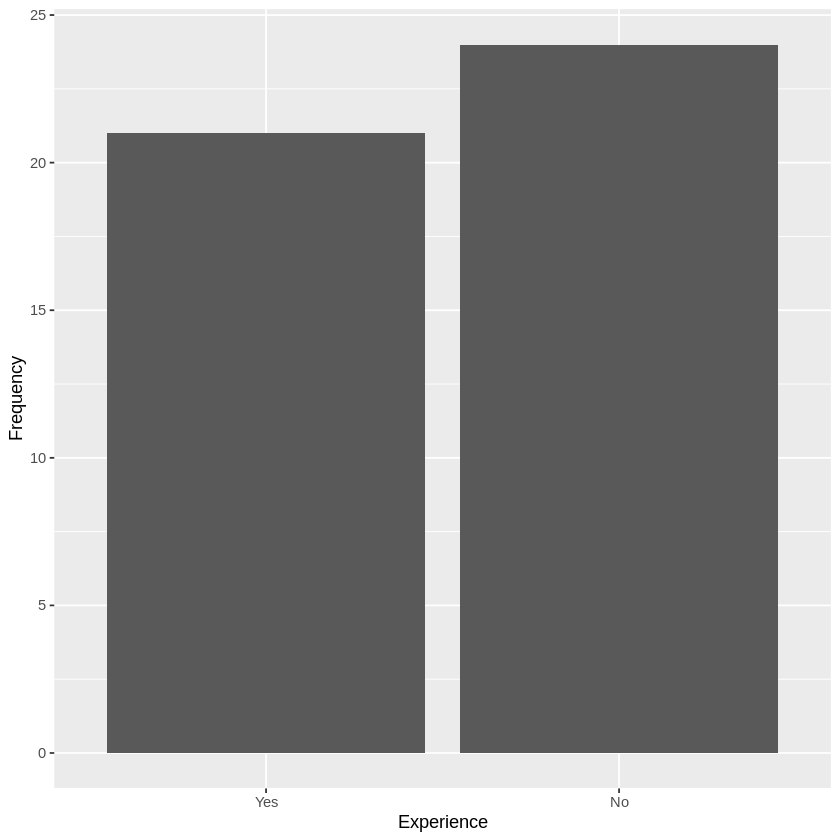

In [5]:
db <- db %>%
        mutate(Experience = factor(db[[5]], levels = c("Yes", "No"))) 

db %>%
    ggplot(aes(Experience)) +
        geom_bar() +
            ylab("Frequency")

In [6]:
db %>%
    filter(db[, 5] == "Yes") %>%
        select(c(5:8))

"Have you ever practiced meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently","If you responded 'yes' to the previous question, what is the total length of time (in months) you practiced/have been practicing meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, which option best describes the frequency of your typical practice of meditation, mindfulness, or contemplative prayer?"
<chr>,<chr>,<chr>,<chr>
Yes,"breathing meditation, diary\ mood tracking",on and off for the last 6 years...,Practice 4-5 times per week
Yes,mindfulness - pay attention to my surroundings or what i eat (pay attention to the taste and my chewing),im not sure but i think i started since sept 2022 ?,Practice daily or near daily
Yes,mindfulness,2 months,Not currently practicing
Yes,mindfulness,1/4 month,Practice weekly
Yes,meditation for 5-10 minutes a few years ago,1 month,Not currently practicing
Yes,meditate once in a while,once or twice a month for 5 minutes,Practice 1-2 times a month
Yes,meditation,6 months,Not currently practicing
Yes,"Journaling, affirmations, meditation, artistics form of expression for grounding (painting)",8 months,Practice weekly
Yes,mindfulness,approximately 10 minutes,Practice 4-5 times per week


In [7]:
db <- db %>% mutate(Experience = ifelse(Experience == 'Yes', 1L, 0L))

exp <- db[["Experience"]]

---

# Cronbach Alpha

## FFMQ

In [8]:
db[, c(1, 9:47)]

Please enter your participant number,"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I’m good at finding words to describe my feelings.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I criticize myself for having irrational or inappropriate emotions.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I perceive my feelings and emotions without having to react to them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I do things, my mind wanders off and I’m easily distracted.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I take a shower or bath, I stay alert to the sensations of water on my body.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I can easily put my beliefs, opinions, and expectations into words.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I don’t pay attention to what I’m doing because I’m daydreaming, worrying, or otherwise distracted.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I watch my feelings without getting lost in them.],⋯,Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I think some of my emotions are bad or inappropriate and I shouldn’t feel them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I notice visual elements in art or nature, such as colors, shapes, textures, or patterns of light and shadow.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [My natural tendency is to put my experiences into words.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I just notice them and let them go.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I do jobs or tasks automatically without being aware of what I’m doing.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I judge myself as good or bad, depending on what the thought/image is about.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I pay attention to how my emotions affect my thoughts and behavior.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opin

In [9]:
psych::alpha(x = db[, 9:47])

Warning message in psych::alpha(x = db[, 9:47]):
“Some items were negatively correlated with the total scale and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [I notice the smells and aromas of things.] ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: psych::alpha(x = db[, 9:47])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.89      0.89    0.99      0.17   8 0.023    3 0.45     0.15

    95% confidence boundaries 
         lower alpha upper
Feldt     0.84  0.89  0.93
Duhachek  0.84  0.89  0.94

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                     raw_alpha
Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]                                                             0.89
Please rate each of the following statements u

## STAI

In [10]:
db[, c(1, 60:79)]

Please enter your participant number,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel nervous and restless.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel satisfied with myself.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I wish I could be as happy as others seem to be.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel like a failure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel rested.],"Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am 'cool, calm, and collected'.]",Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel that difficulties are piling up so that I can't overcome them.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I worry too much over something that really doesn't matter.],⋯,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I have disturbing thoughts.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so kee

In [11]:
psych::alpha(x = db[, 60:79])


Reliability analysis   
Call: psych::alpha(x = db[, 60:79])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.92      0.92    0.96      0.38  12 0.016  2.5 0.6     0.37

    95% confidence boundaries 
         lower alpha upper
Feldt     0.89  0.92  0.95
Duhachek  0.89  0.92  0.96

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                  raw_alpha
Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]                                                                              0.92
Please read the following statements and select the i

---

# Behavioural Data

In [12]:
db[, c(1, 81:86)]

Please enter your participant number,Go Correct,noGo Correct,delta Go,Go Correct 1,noGo Correct 1,Go Correct 2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9001,98.8,81.0,62.8,98.5,80.0,99.0
9002,97.5,72.0,63.5,98.5,72.0,96.5
9003,95.0,67.0,62.6,94.0,68.0,96.0
9004,97.8,65.0,65.2,98.0,82.0,97.5
9005,98.2,80.0,62.6,98.0,88.0,98.5
9006,97.5,78.6,62.8,96.5,76.0,98.5
9007,96.1,44.8,67.8,96.5,52.0,95.6
9008,96.5,68.0,63.5,96.0,66.0,97.0
9009,98.2,52.5,68.3,97.5,58.0,99.0


In [13]:
db[db[82] < 60, c(1, 82, 83)] 
db[db[82] > 80, c(1, 82, 83)] 

,Please enter your participant number,noGo Correct,delta Go
,<dbl>,<dbl>,<dbl>
7,9007,44.8,67.8
9,9009,52.5,68.3
13,9014,43.0,69.3
14,9015,49.0,68.7
16,9017,28.0,69.3
19,9020,57.3,65.9
20,9021,45.9,65.1
22,9023,53.1,66.3
23,9024,38.5,61.1


,Please enter your participant number,noGo Correct,delta Go
,<dbl>,<dbl>,<dbl>
1,9001,81,62.8
12,9013,91,61.0
18,9019,83,61.2
29,9031,93,60.0
32,9034,84,61.2
38,9041,87,61.2
41,9052,83,61.3


# FFMQ and STAI

In [14]:
db[, c(1, 48:59)]

Please enter your participant number,Observing Total,Describing Total,ActAware Total,Nonjudging Total,Nonreactivity Total,FFMQ Total,Observing Mean,Describing Mean,ActAware Mean,Nonjudging Mean,Nonreactivity Mean,FFMQ Mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9001,23,25,17,19,15,99,2.88,3.12,2.12,2.38,2.14,2.54
9002,26,30,29,29,24,138,3.25,3.75,3.62,3.62,3.43,3.54
9003,30,30,27,20,19,126,3.75,3.75,3.38,2.50,2.71,3.23
9004,34,38,37,29,26,164,4.25,4.75,4.62,3.62,3.71,4.21
9005,29,9,23,14,20,95,3.62,1.12,2.88,1.75,2.86,2.44
9006,28,22,28,29,20,127,3.50,2.75,3.50,3.62,2.86,3.26
9007,22,26,28,31,17,124,2.75,3.25,3.50,3.88,2.43,3.18
9008,29,26,18,17,24,114,3.62,3.25,2.25,2.12,3.43,2.92
9009,18,16,23,28,24,109,2.25,2.00,2.88,3.50,3.43,2.79


In [15]:
db[, c(1, 60:80)]

Please enter your participant number,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel nervous and restless.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel satisfied with myself.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I wish I could be as happy as others seem to be.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel like a failure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel rested.],"Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am 'cool, calm, and collected'.]",Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel that difficulties are piling up so that I can't overcome them.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I worry too much over something that really doesn't matter.],⋯,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so keenly I can't put them out of my mind.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each st

---

# Setting variables

In [16]:
obt = db[["Observing Total"]]
dbt = db[["Describing Total"]]
aat = db[["ActAware Total"]]
nrt = db[["Nonreactivity Total"]]
njt = db[["Nonjudging Total"]]
stai = db[["STAI Total"]]
ffmqt = db[["FFMQ Total"]]

gc = db[["Go Correct"]]
ngc = db[["noGo Correct"]]
dgc = db[["delta Go"]]

gc1 = db[["Go Correct 1"]]
ngc1 = db[["noGo Correct 1"]]

gc2 = db[["Go Correct 2"]]
ngc2 = db[["noGo Correct 2"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- (fgc - mean(fgc))/sd(fgc)
zfr <- (fngc - mean(fngw))/sd(fngw)
dprime <- zhr - zfr

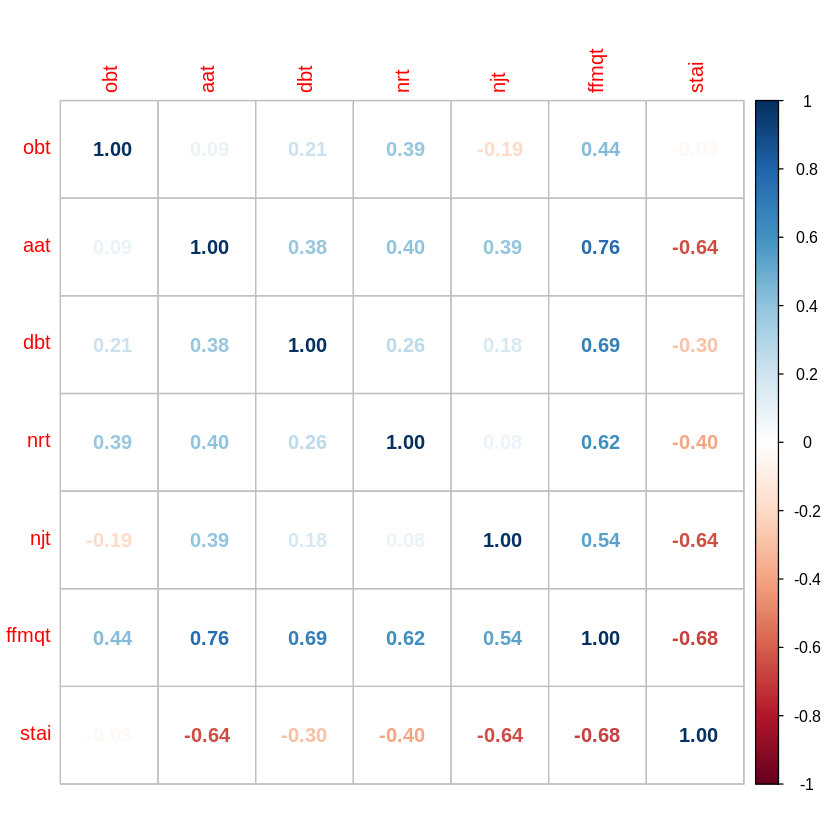

In [17]:
df <- data.frame(obt, aat, dbt, nrt, njt, ffmqt, stai)

corrplot(cor(df), method = "number")

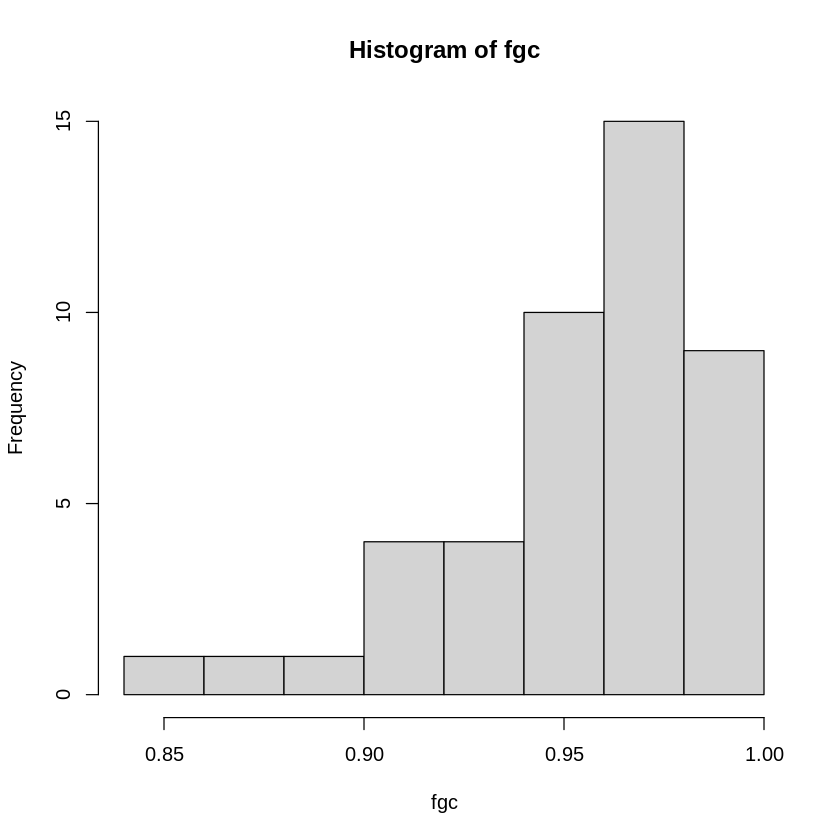

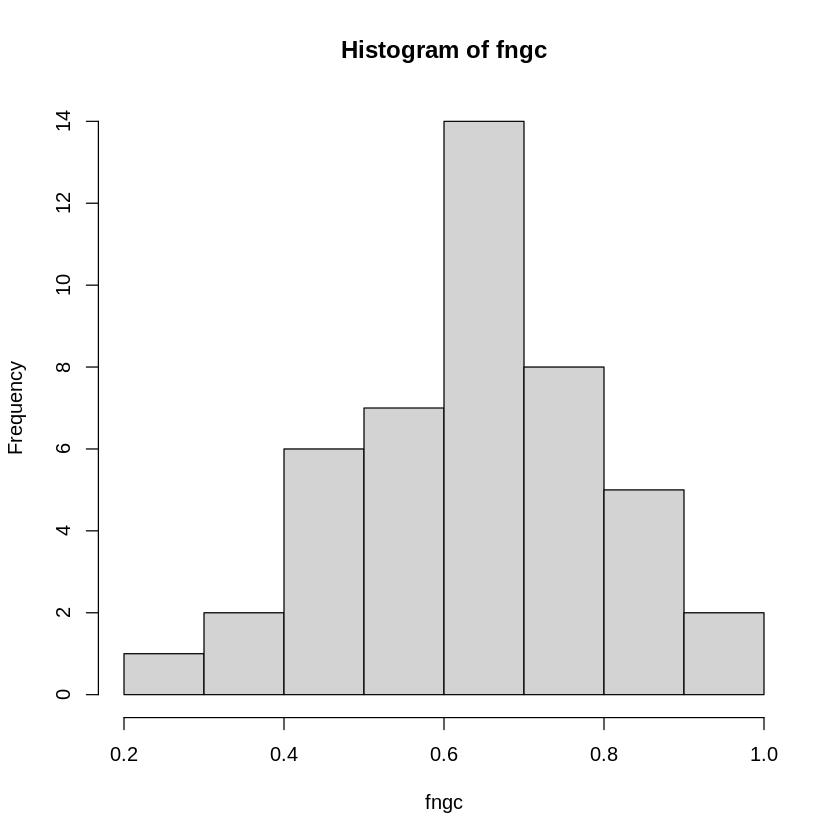

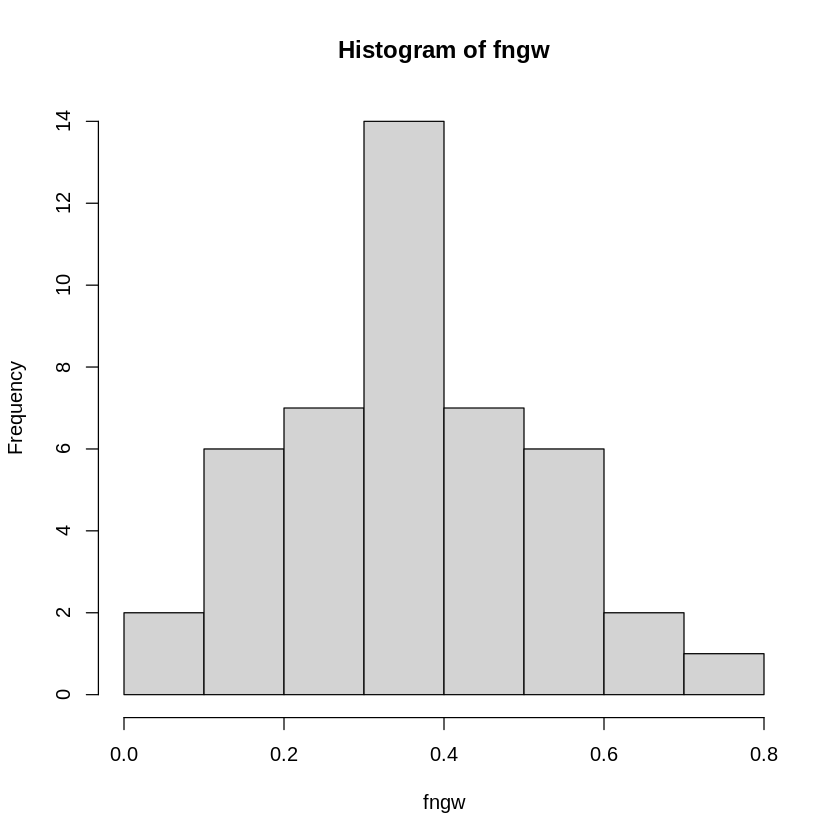

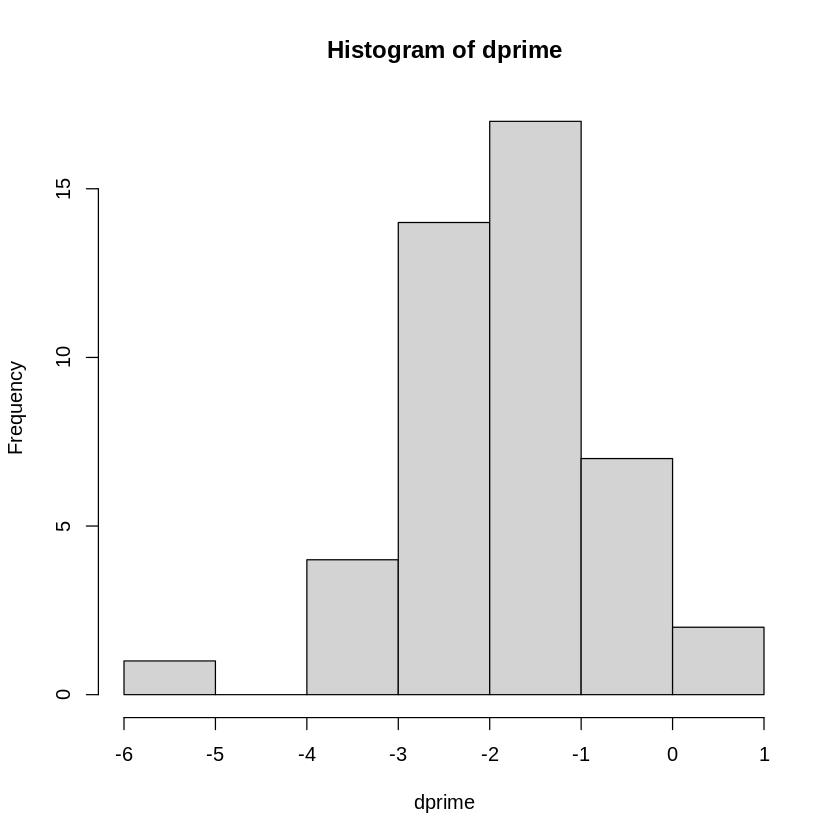

In [18]:
hist(fgc)
hist(fngc)
hist(fngw)
hist(dprime)

# Prelim

## Basic lm

### Trait Anx and Mindfulness Exp


Call:
lm(formula = stai ~ exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.714  -7.714  -0.714   7.286  27.250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    47.75       2.40   19.86   <2e-16 ***
exp1            4.96       3.52    1.41     0.17    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.8 on 43 degrees of freedom
Multiple R-squared:  0.0442,	Adjusted R-squared:  0.022 
F-statistic: 1.99 on 1 and 43 DF,  p-value: 0.166


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9906         0.9711 
Kolmogorov-Smirnov        0.0528         0.9996 
Cramer-von Mises          3.4806         0.0000 
Anderson-Darling          0.1312         0.9801 
-----------------------------------------------

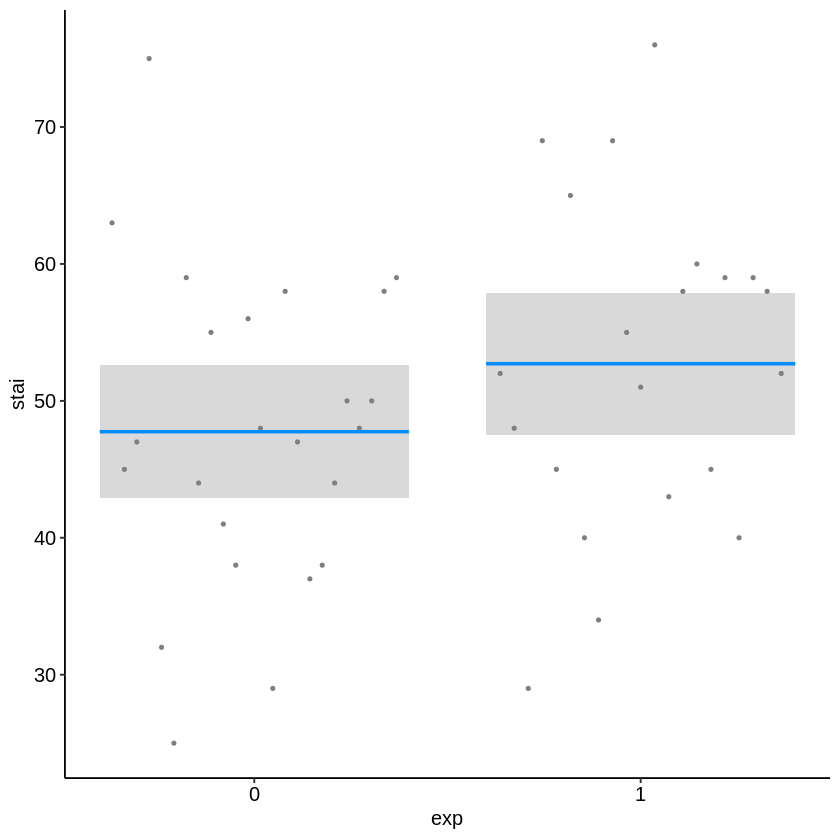

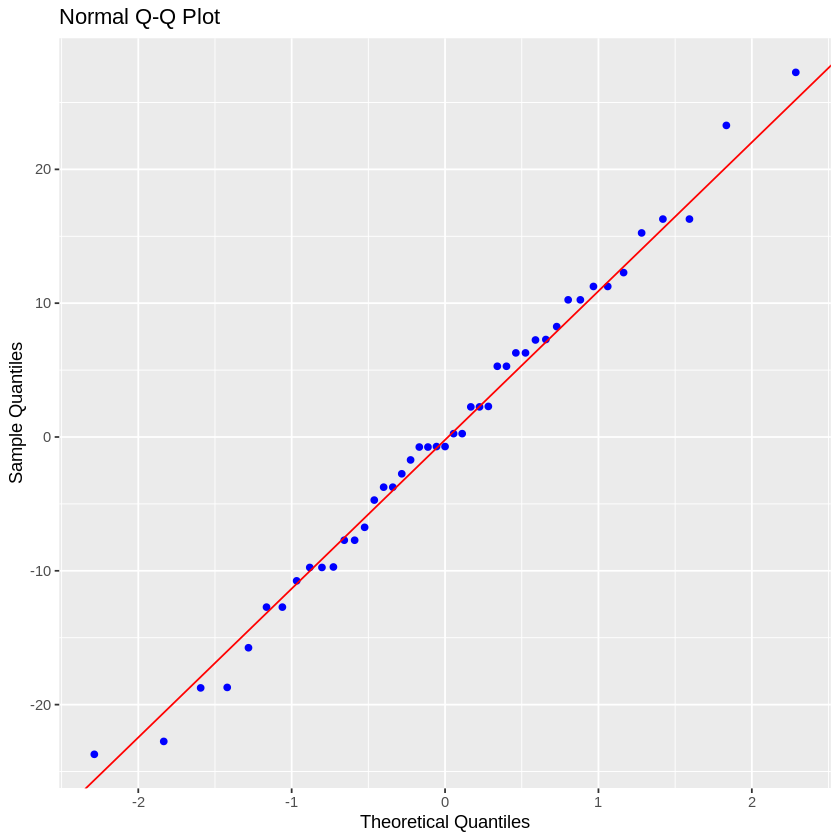


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.0295     1    0.8636 
 ----------------------------------------
  simultaneous     0.0295     1    0.8636 
 ----------------------------------------

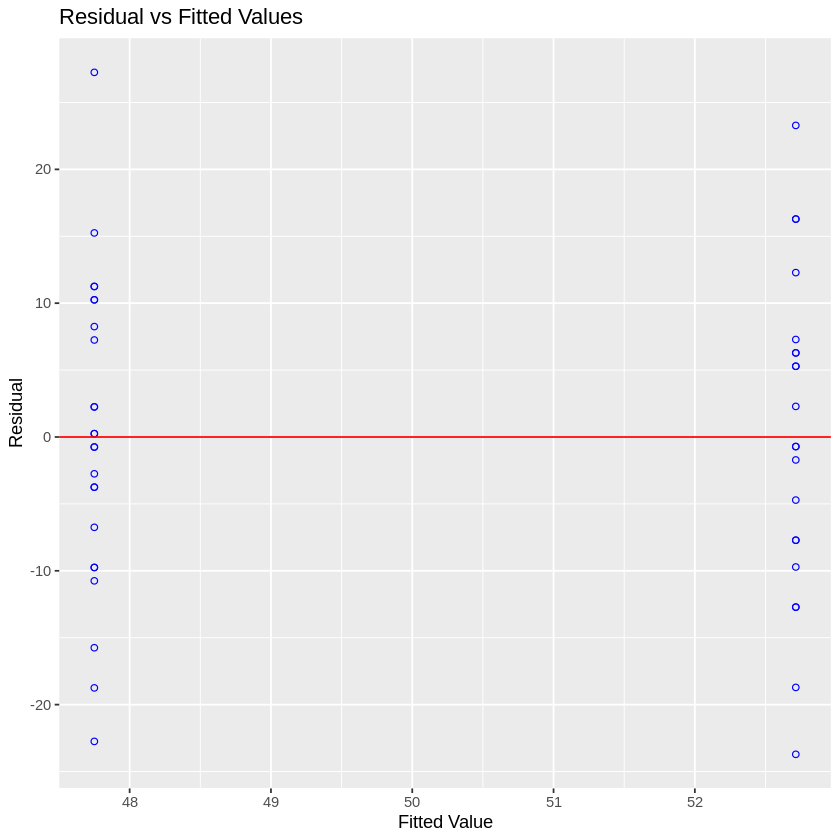

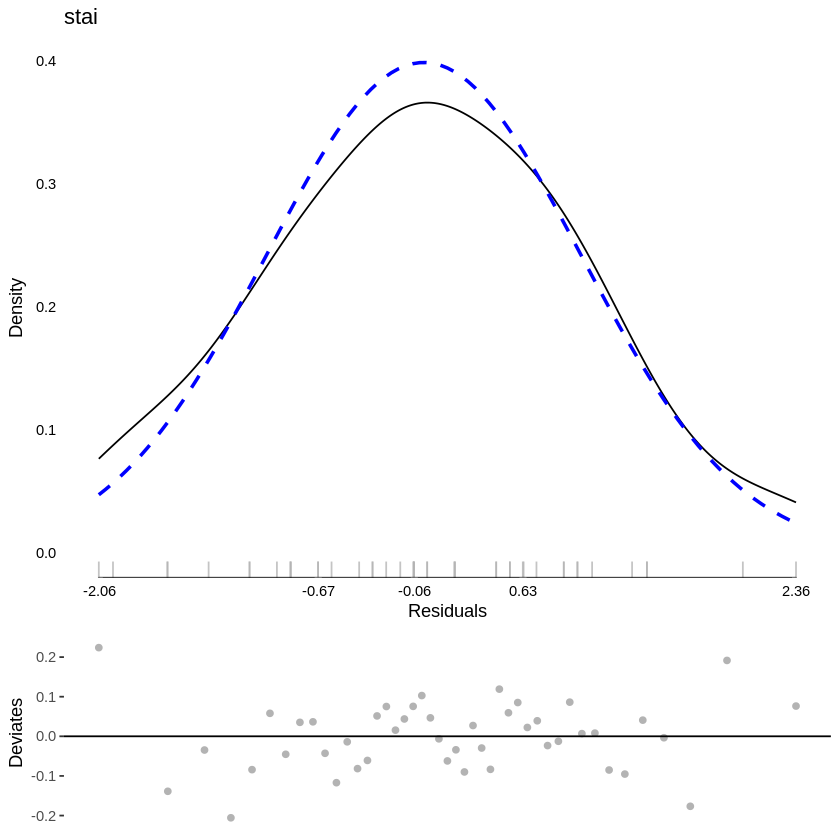

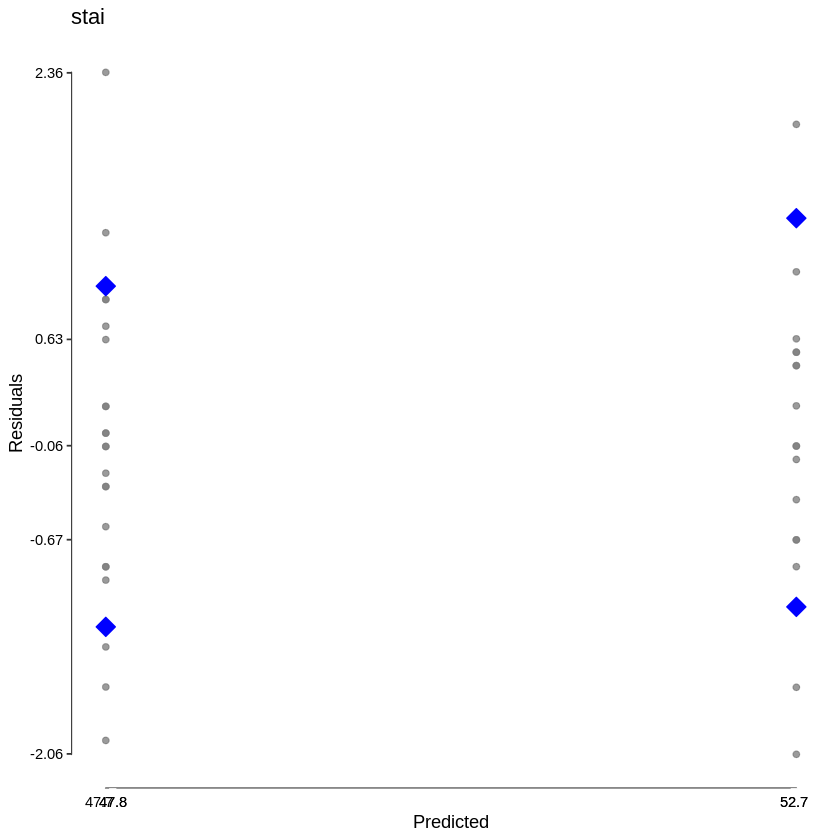

In [19]:
exp <- factor(exp)
expi <- lm(stai ~ exp)

summary(expi)
visreg(expi, xvar = "exp", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(expi)
ols_plot_resid_qq(expi)
ols_plot_resid_fit(expi)
ols_test_breusch_pagan(expi, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(expi, ev.perc = .005)
plot(md)

In [20]:
t.test(ngc1, ngc2, paired = TRUE)


	Paired t-test

data:  ngc1 and ngc2
t = 4, df = 44, p-value = 8e-04
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
  2.99 10.56
sample estimates:
mean difference 
           6.78 


### STAI and FFMQ Total


Call:
lm(formula = stai ~ ffmqt)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.688  -7.127   0.444   4.223  21.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 104.8055     9.0610   11.57  8.7e-15 ***
ffmqt        -0.4649     0.0761   -6.11  2.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.82 on 43 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.452 
F-statistic: 37.3 on 1 and 43 DF,  p-value: 2.57e-07


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.991          0.9773 
Kolmogorov-Smirnov        0.0696         0.9707 
Cramer-von Mises          3.2565         0.0000 
Anderson-Darling          0.1933         0.8889 
-----------------------------------------------

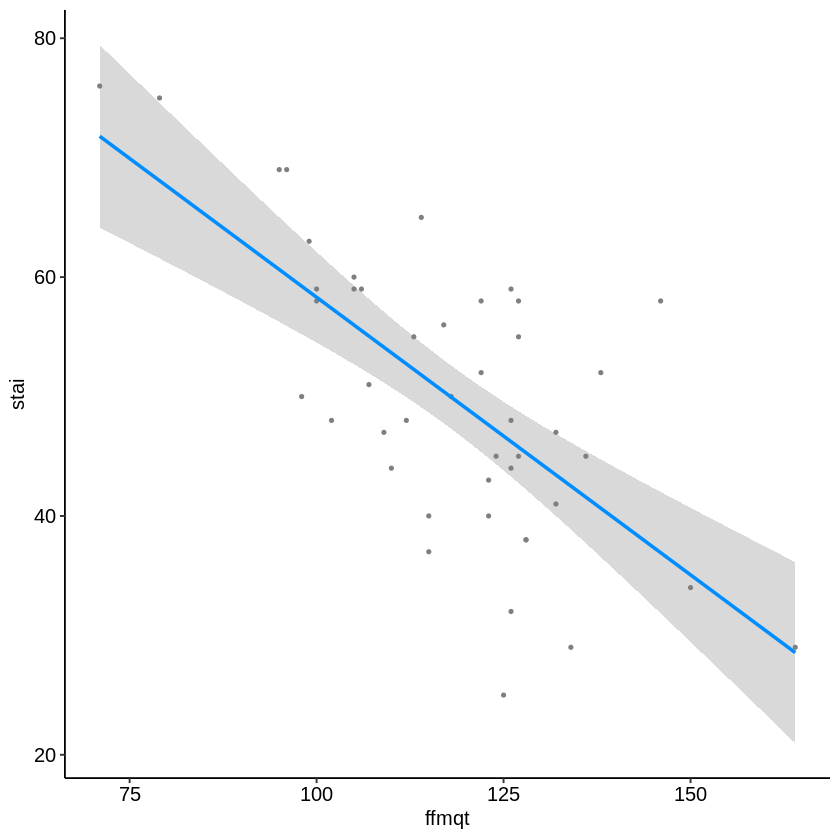

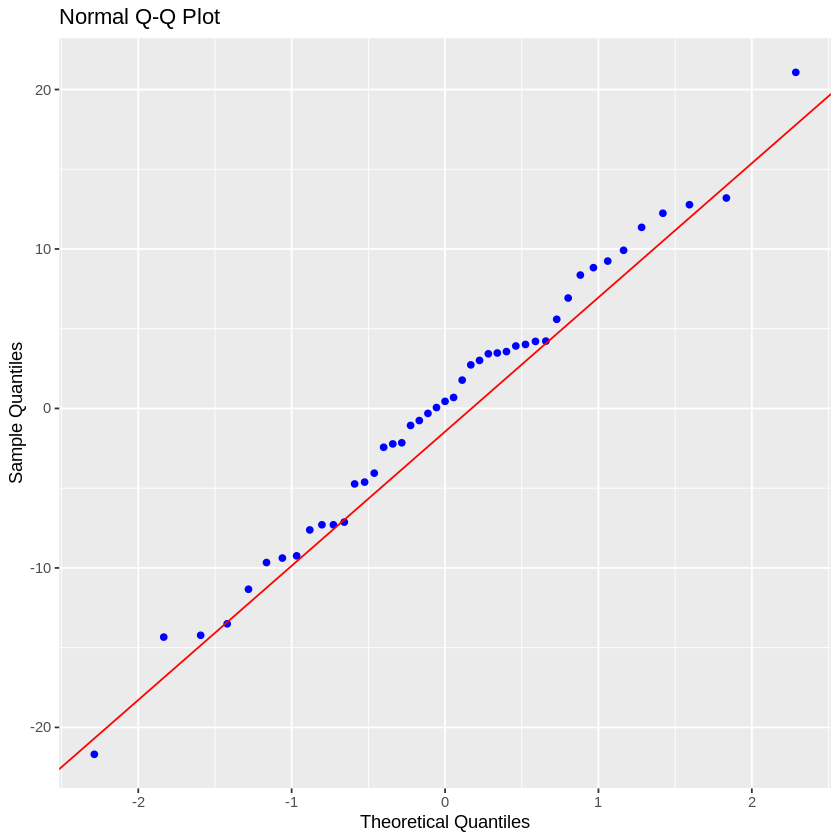


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               1.8251     1    0.1767 
 ----------------------------------------
  simultaneous     1.8251     1    0.1767 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


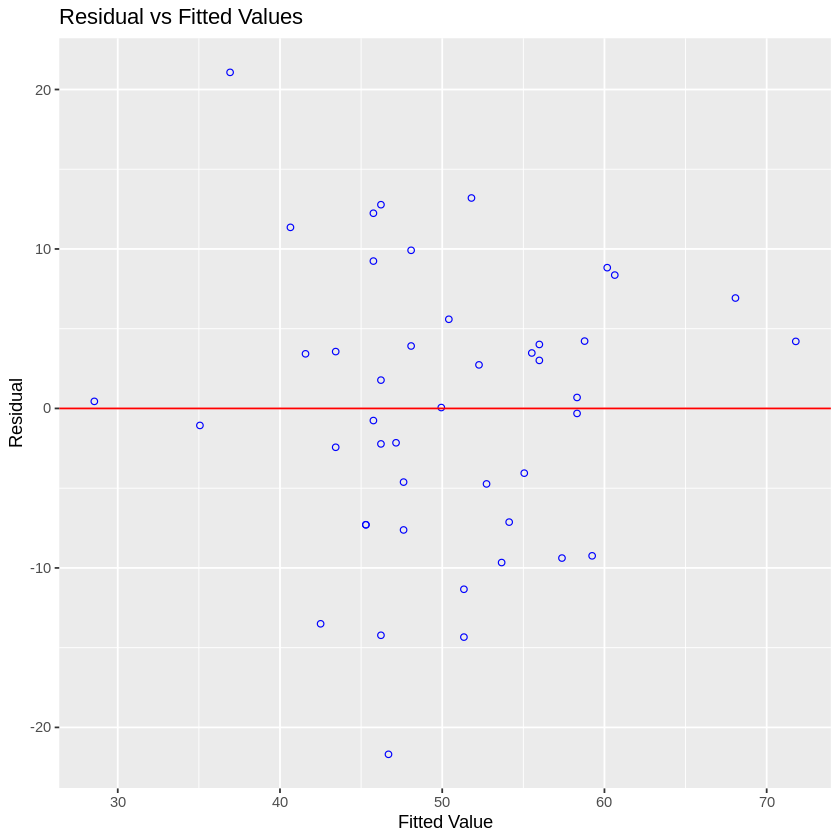

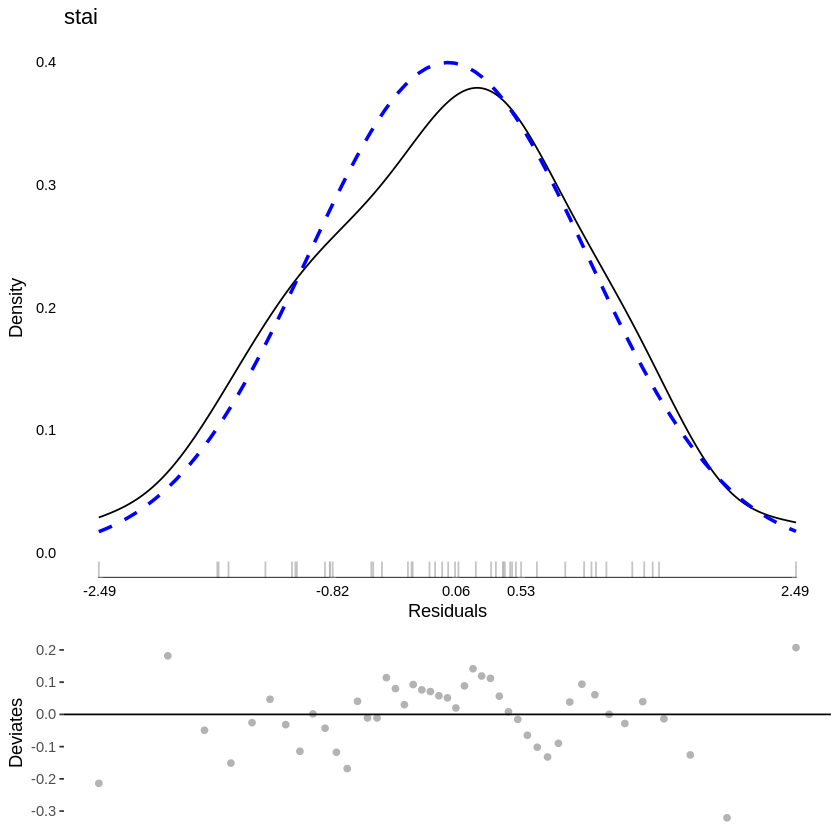

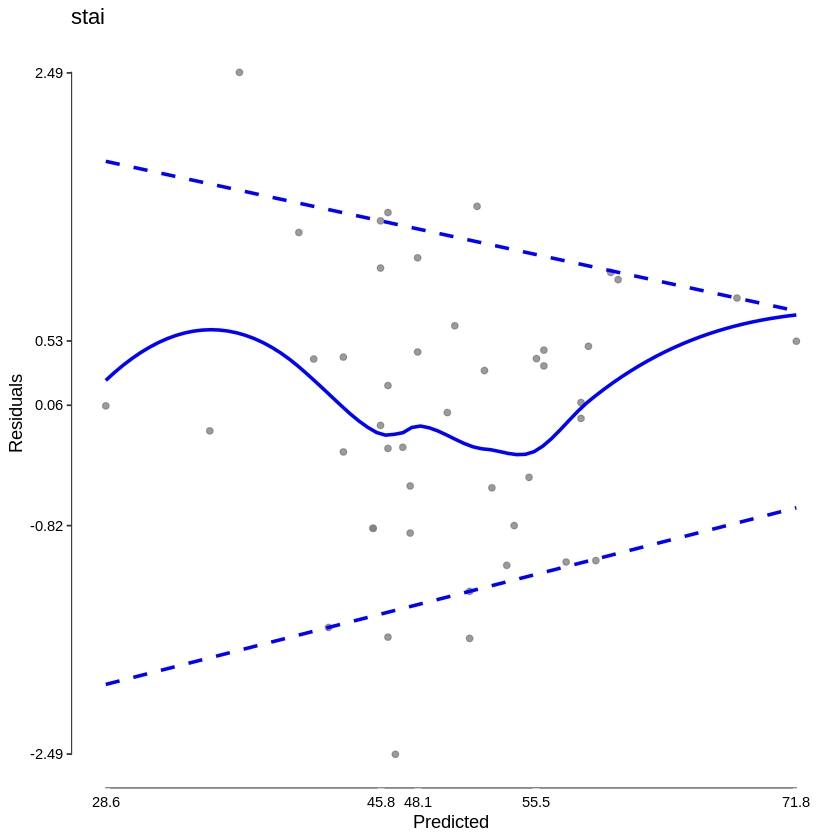

In [21]:
malt <- lm(stai ~ ffmqt)

summary(malt)
visreg(malt, xvar = "ffmqt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

---

### Controlling for STAI and Facets

### Go Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = gc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-6.475 -1.526  0.326  2.160  3.697 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 83.98658    6.20096   13.54    4e-16 ***
xvar         0.26834    0.08621    3.11   0.0035 ** 
obt         -0.23433    0.08209   -2.85   0.0069 ** 
dbt          0.09171    0.07066    1.30   0.2021    
nrt         -0.00623    0.12161   -0.05   0.9594    
njt          0.04243    0.08324    0.51   0.6132    
stai         0.15883    0.05477    2.90   0.0062 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.63 on 38 degrees of freedom
Multiple R-squared:  0.391,	Adjusted R-squared:  0.294 
F-statistic: 4.06 on 6 and 38 DF,  p-value: 0.00306


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9514         0.0572 
Kolmogorov-Smirnov        0.1185         0.5142 
Cramer-von Mises          3.1167         0.0000 
Anderson-Darling          0.632          0.0934 
-----------------------------------------------

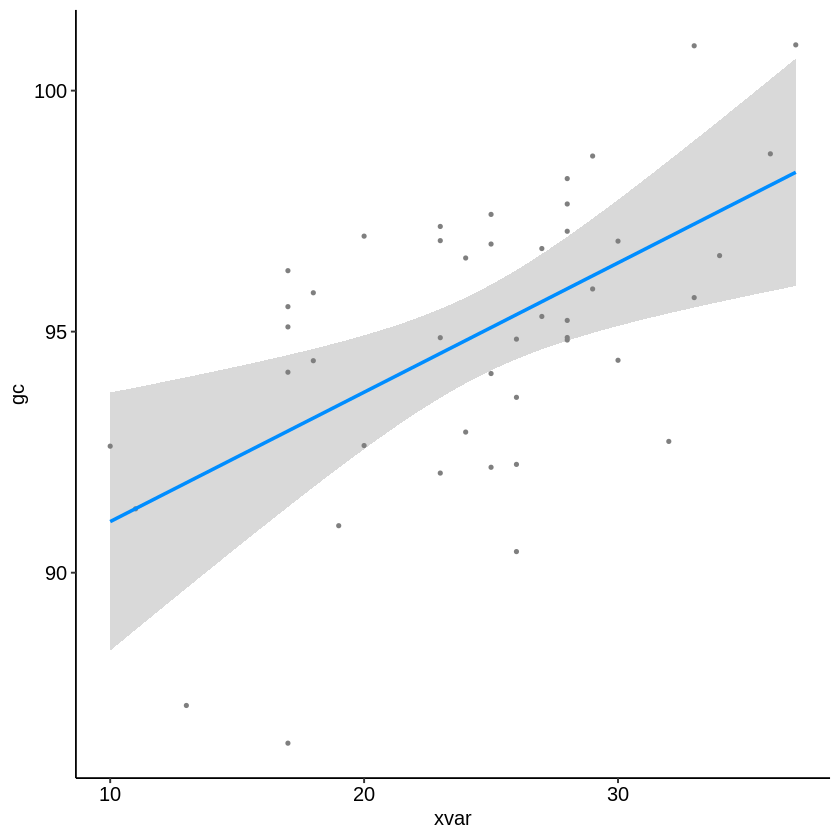

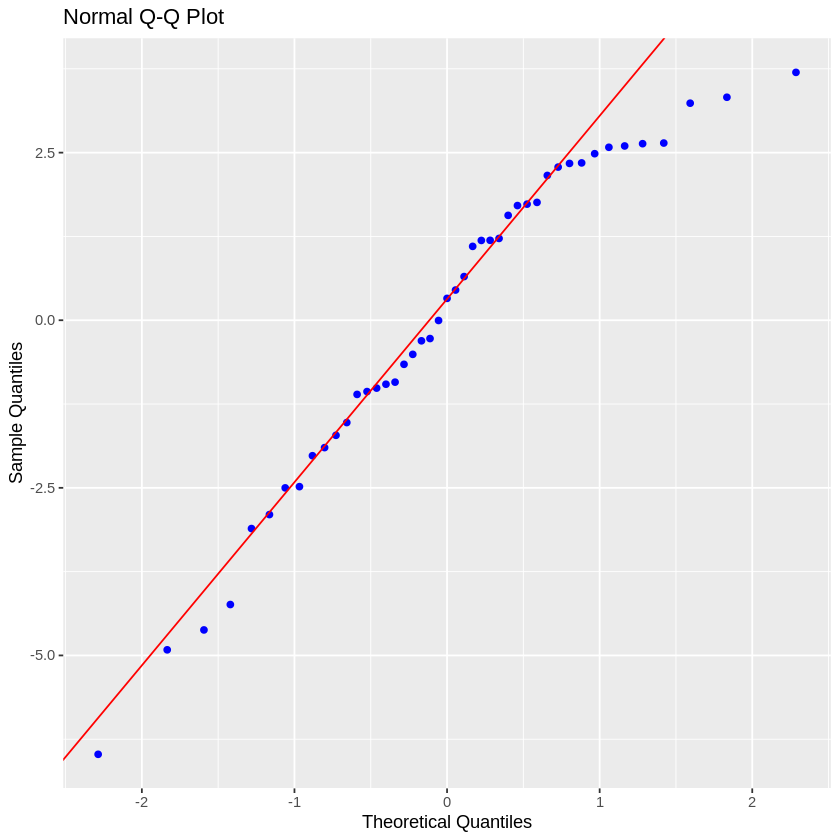


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : gc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  xvar             1.4523     1    1.0000 
  obt              0.2908     1    1.0000 
  dbt              0.7027     1    1.0000 
  nrt              0.0222     1    1.0000 
  njt              1.3297     1    1.0000 
  stai             0.0795     1    1.0000 
 ----------------------------------------
  simultaneous     7.0959     6    0.3121 
 ----------------------------------------

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
xvar,0.531,1.88
obt,0.777,1.29
dbt,0.815,1.23
nrt,0.663,1.51
njt,0.525,1.90
stai,0.368,2.71


Eigenvalue,Condition Index,intercept,xvar,obt,dbt,nrt,njt,stai
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.71641,1.00,8.78e-05,0.000687,0.000697,0.00101,4.83e-04,0.000915,0.000395
0.13249,7.12,5.15e-04,0.031156,0.011216,0.00365,3.76e-05,0.106274,0.070238
0.06010,10.57,2.18e-03,0.040463,0.061317,0.09327,2.56e-02,0.316347,0.052194
0.03921,13.09,1.86e-04,0.020814,0.100820,0.83401,8.05e-02,0.000721,0.007882
0.02983,15.01,1.37e-03,0.538652,0.339441,0.04351,2.08e-03,0.122780,0.043337
0.01881,18.90,2.21e-04,0.193539,0.447413,0.01690,7.32e-01,0.003436,0.000611
0.00316,46.10,9.95e-01,0.174688,0.039096,0.00765,1.59e-01,0.449527,0.825342


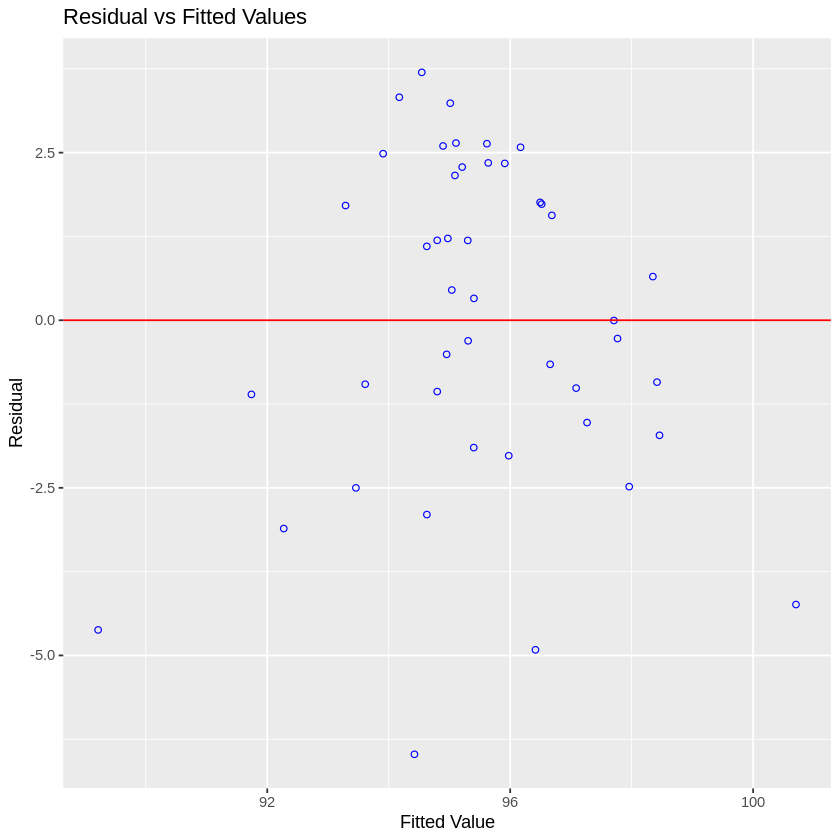

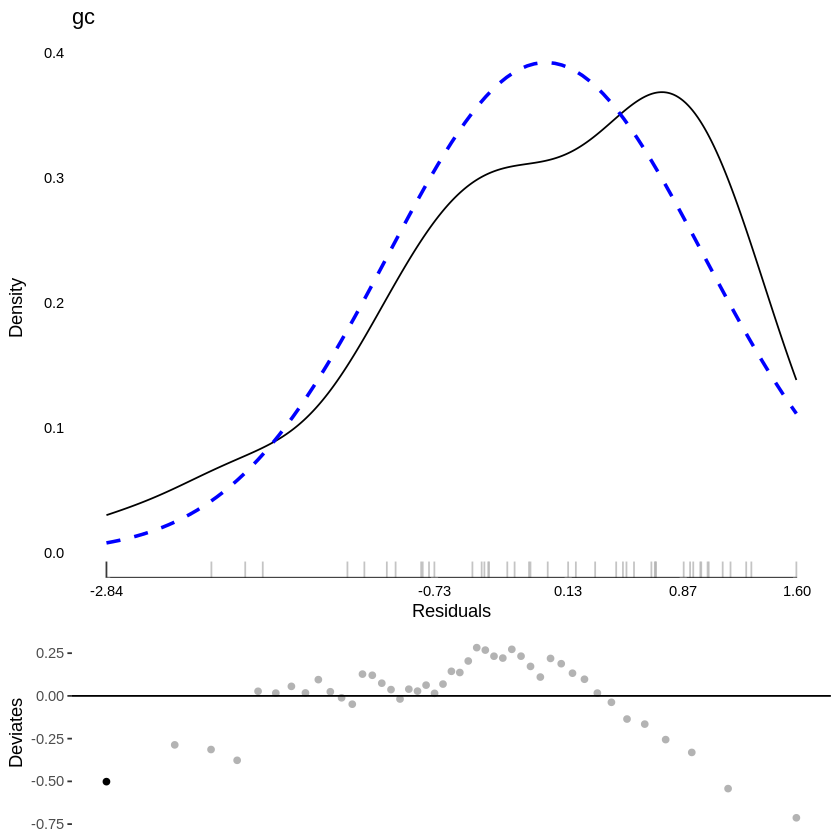

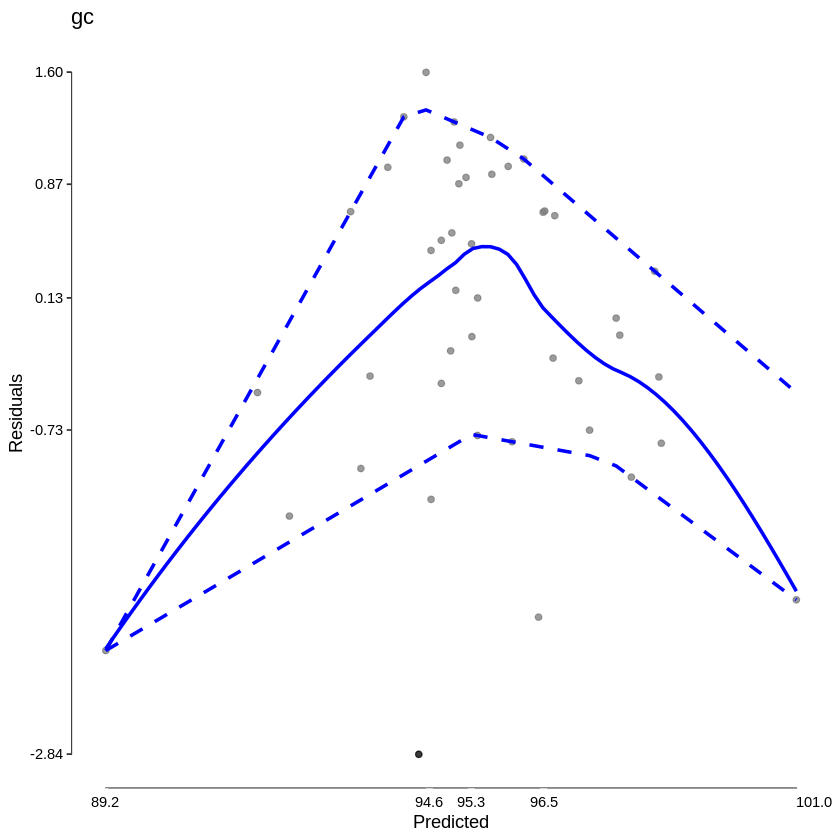

In [22]:
xvar = aat

malt <- lm(gc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

ols_vif_tol(malt)
ols_eigen_cindex(malt)

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### noGo Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = ngc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-36.11  -9.73   1.56  10.16  28.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   70.785     37.844    1.87    0.069 .
xvar           0.102      0.526    0.19    0.847  
obt           -0.358      0.501   -0.71    0.480  
dbt            0.461      0.431    1.07    0.291  
nrt           -0.419      0.742   -0.56    0.576  
njt           -0.416      0.508   -0.82    0.418  
stai           0.132      0.334    0.40    0.694  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16 on 38 degrees of freedom
Multiple R-squared:  0.0884,	Adjusted R-squared:  -0.0555 
F-statistic: 0.614 on 6 and 38 DF,  p-value: 0.718


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk               0.98          0.6185 
Kolmogorov-Smirnov        0.1047         0.6686 
Cramer-von Mises          3.7108         0.0000 
Anderson-Darling          0.2976         0.5745 
-----------------------------------------------

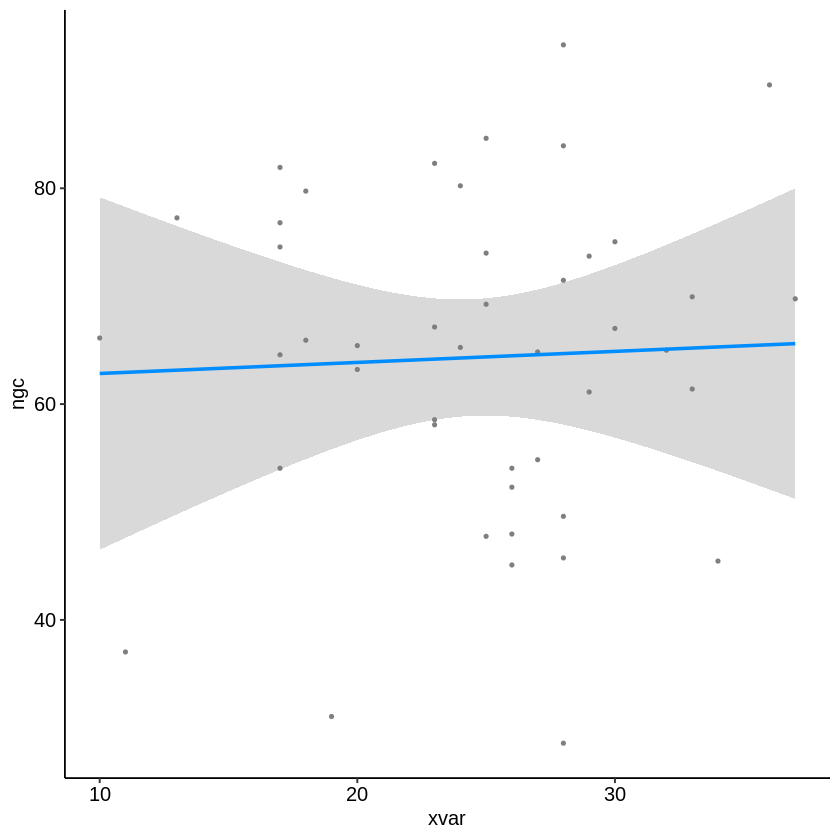

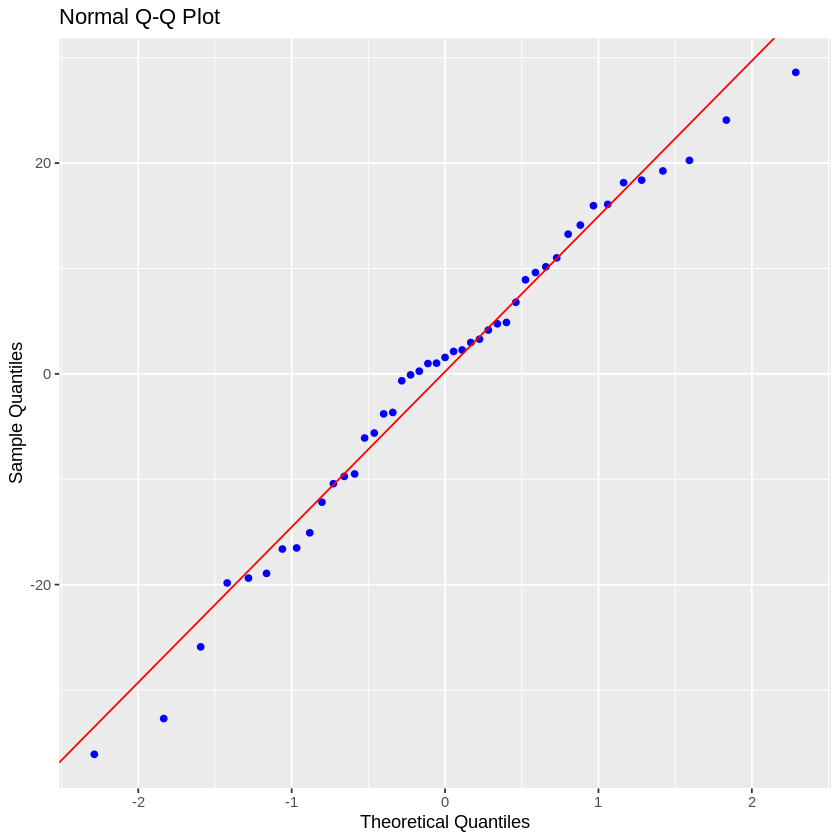


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : ngc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  xvar             0.00170     1    1.0000 
  obt              0.51088     1    1.0000 
  dbt              0.69364     1    1.0000 
  nrt              1.49782     1    1.0000 
  njt              0.00085     1    1.0000 
  stai             0.01535     1    1.0000 
 -----------------------------------------
  simultaneous     2.69456     6    0.8461 
 -----------------------------------------

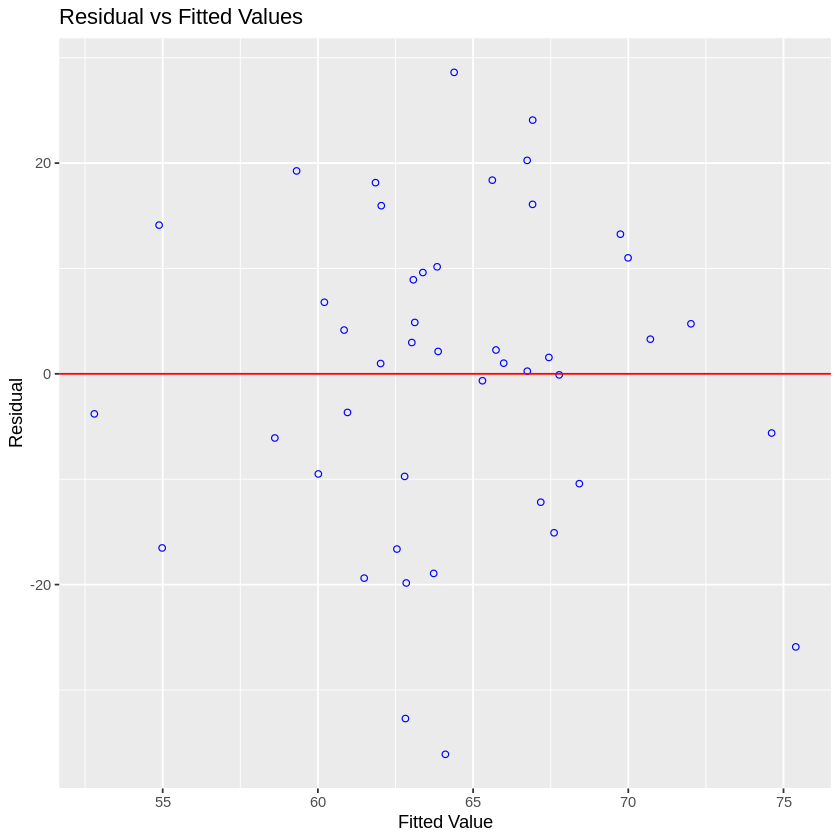

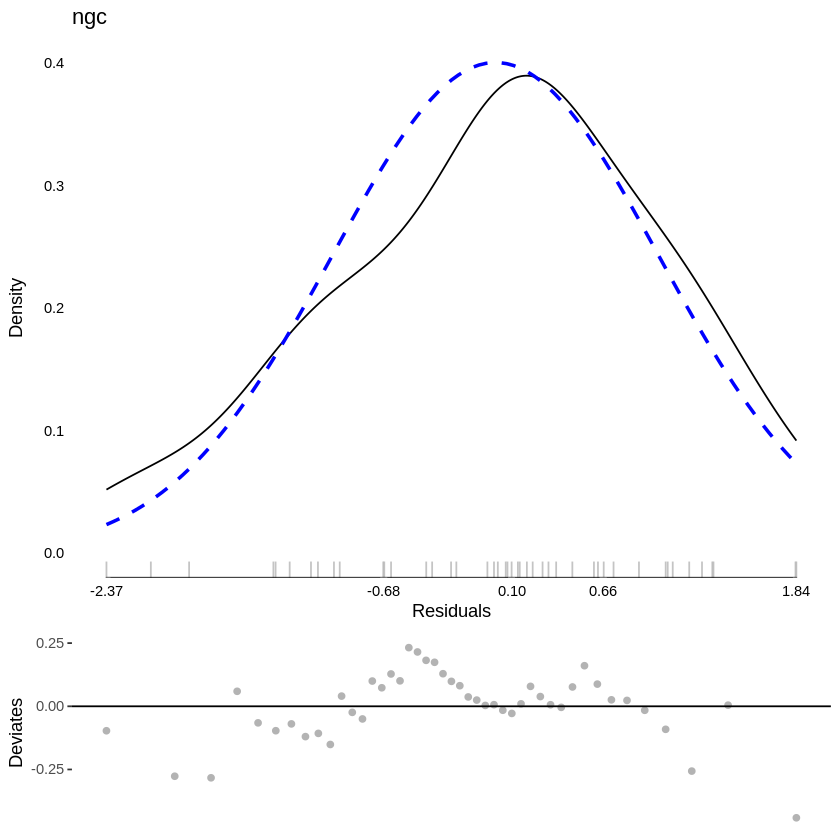

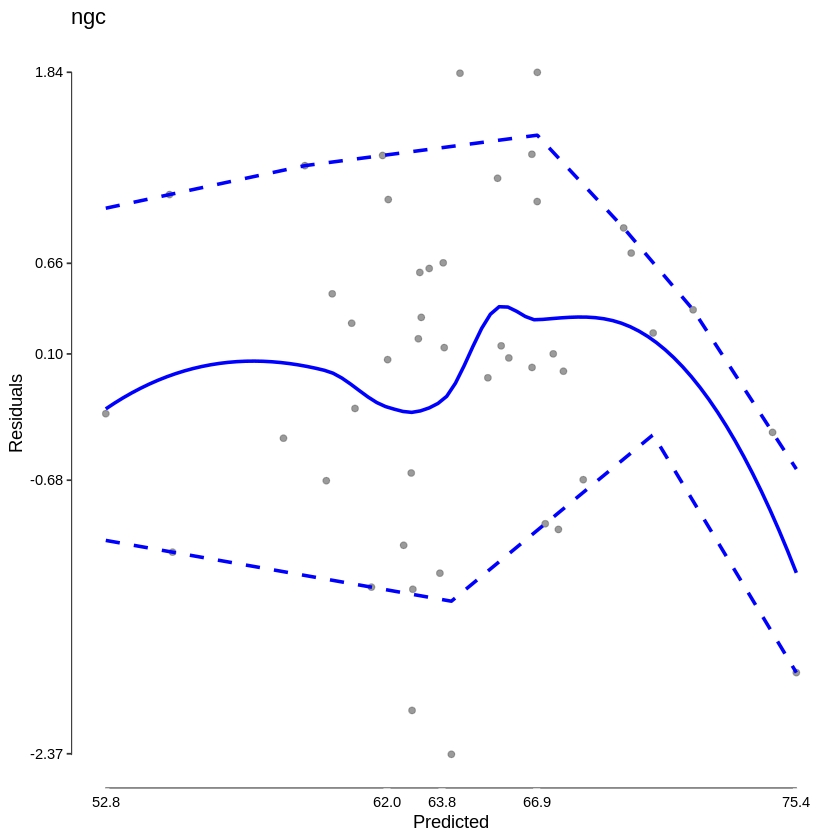

In [23]:
xvar = aat
malt <- lm(ngc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

# Frac Log Regression

## Controlling for other facets


Call:
glm(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.03402    1.33442    0.77   0.4432   
obt         -0.06136    0.02005   -3.06   0.0040 **
aat          0.05653    0.01787    3.16   0.0031 **
dbt          0.01581    0.01456    1.09   0.2842   
nrt          0.00802    0.02801    0.29   0.7761   
njt          0.00508    0.01743    0.29   0.7724   
stai         0.03272    0.01140    2.87   0.0067 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0135)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.49050  on 38  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


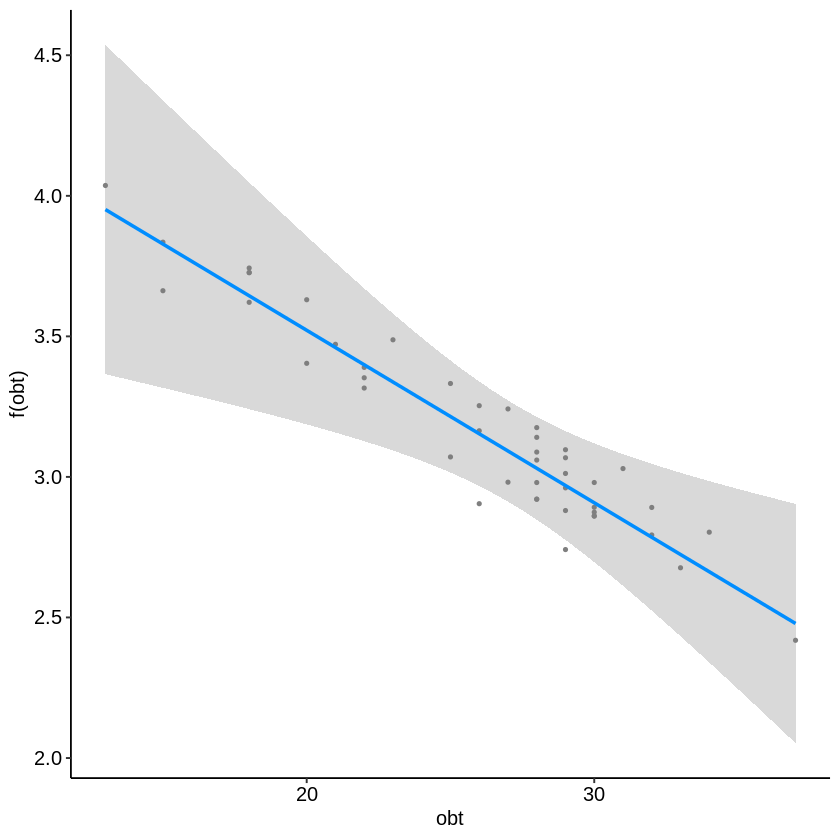

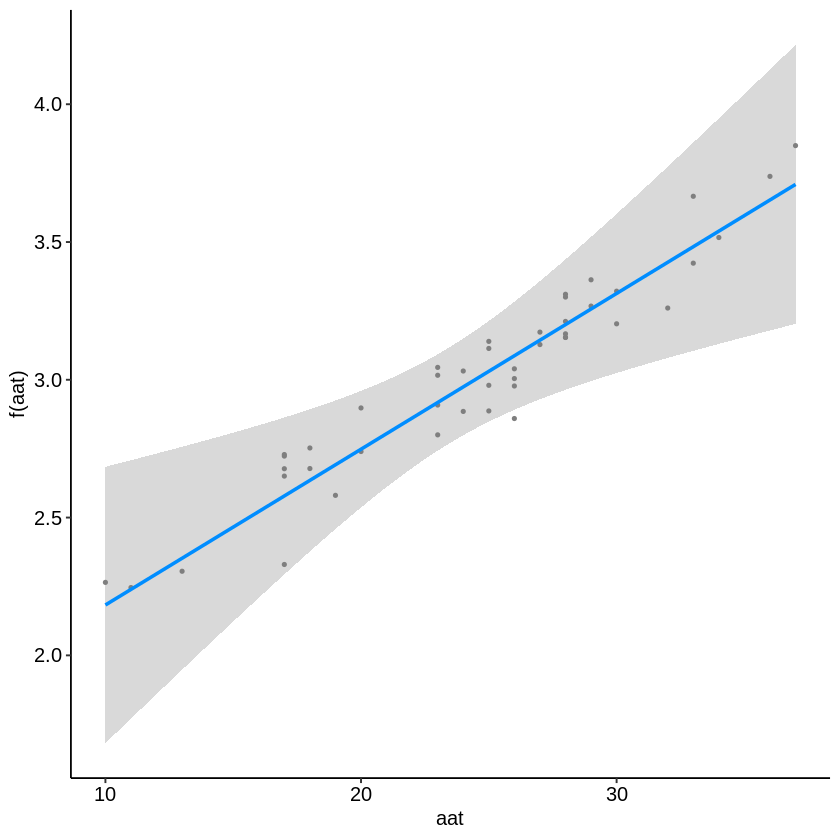

In [24]:
frac_malt <- glm(fgc ~ obt + aat + dbt + nrt + njt + stai, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()
visreg(frac_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()

In [25]:
plogis(1.03402 + -0.06136) - plogis(1.03402)
# One unit increase in observation leads to a 1.2% decrease in proportion of Go correct

plogis(1.03402 + 0.05653) - plogis(1.03402)
# One unit increase in observation leads to a 1% increase in proportion of Go correct

[1] -0.012

[1] 0.0108


Call:
glm(formula = fgc ~ aat, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4681     0.3953    6.24  1.6e-07 ***
aat           0.0243     0.0162    1.50     0.14    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0203)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.82246  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


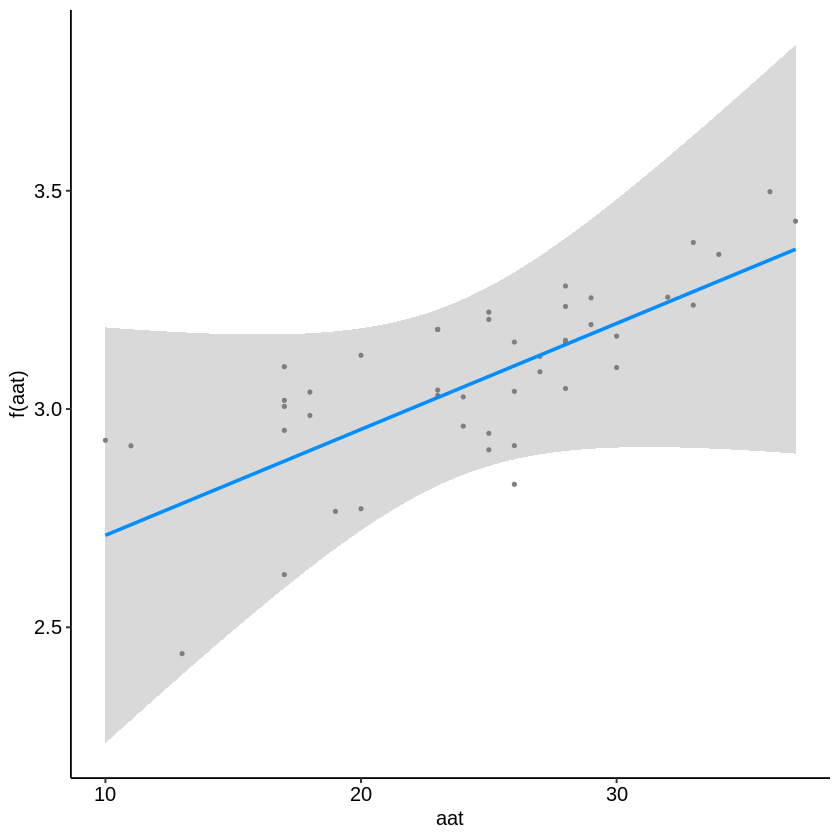

In [26]:
frac_malt <- glm(fgc ~ aat, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()


Call:
glm(formula = fngc ~ obt, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.8934     0.5049    1.77    0.084 .
obt          -0.0117     0.0190   -0.62    0.541  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.108)

    Null deviance: 4.8594  on 44  degrees of freedom
Residual deviance: 4.8182  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


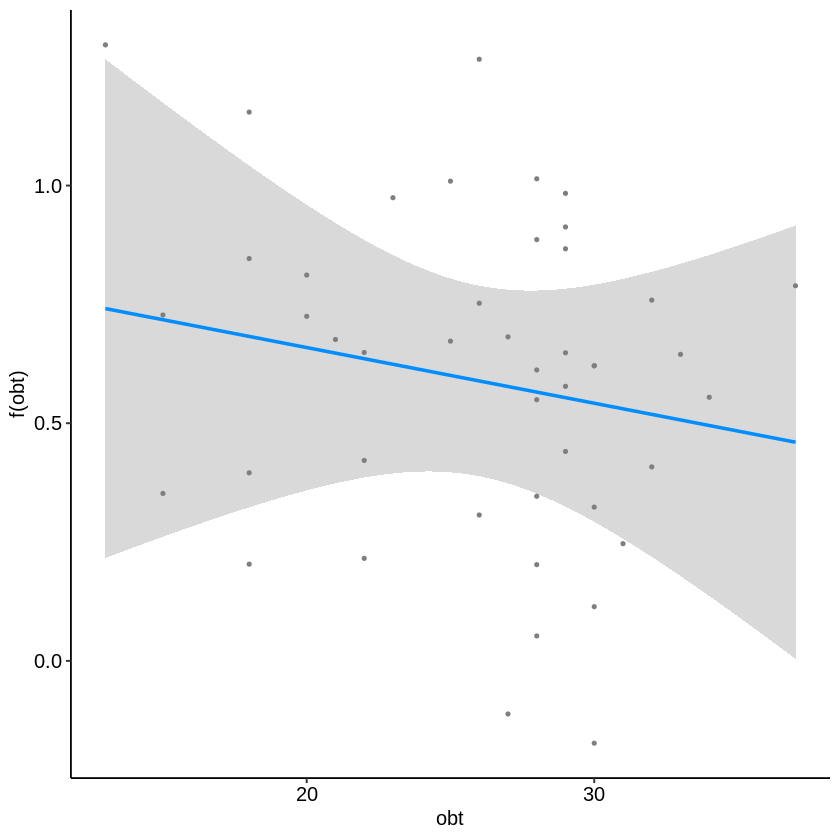

In [27]:
frac_malt <- glm(fngc ~ obt, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

# Beta Regression

## Controlling for other facets


Call:
betareg(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.515 -0.759 -0.155  0.864  2.112 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.69953    1.12113    0.62  0.53266    
obt         -0.05579    0.01653   -3.37  0.00074 ***
aat          0.05393    0.01520    3.55  0.00039 ***
dbt          0.01481    0.01238    1.20  0.23162    
nrt          0.00587    0.02326    0.25  0.80073    
njt          0.01459    0.01510    0.97  0.33382    
stai         0.03506    0.00963    3.64  0.00027 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     91.7       19.7    4.65  3.3e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  114 on 8 Df
Pseudo R-squared: 0.311
Number of iterations: 33 (

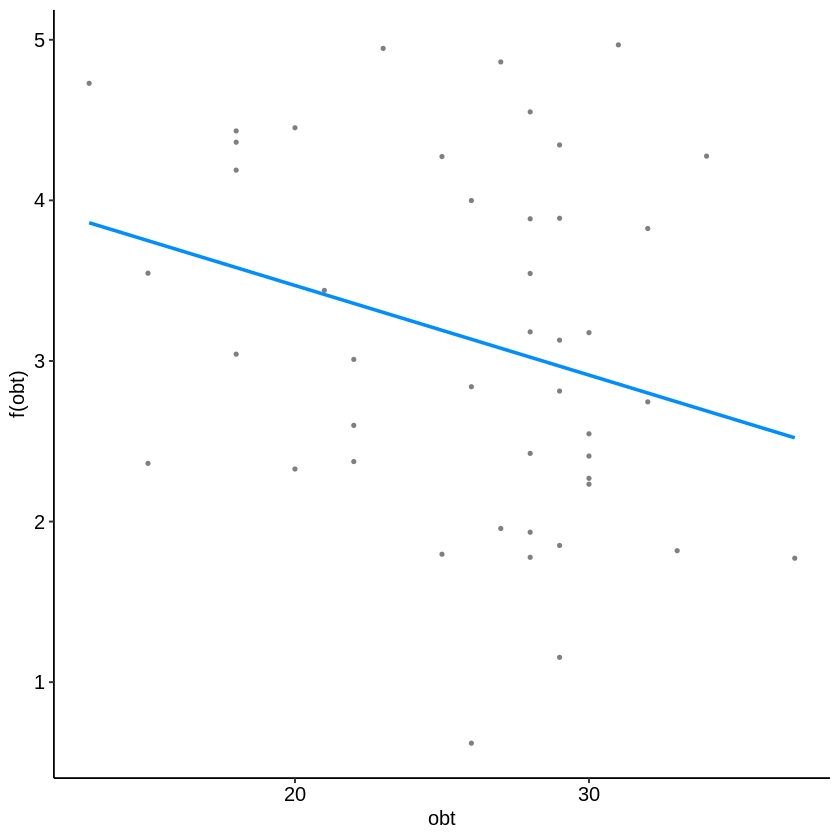

In [28]:
beta_malt <- betareg(fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit") # remove precision because non sig
summary(beta_malt)

visreg(beta_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

In [29]:
plogis(0.69953 + -0.05579) - plogis(0.69953)

#One unit increase in observation leads to a 1.25% decrease in proportion of correct Gos

which(cooks.distance(beta_malt) > 1)

[1] -0.0125

named integer(0)

In [30]:
avg_slopes(beta_malt, variables = "obt")
avg_slopes(beta_malt, variables = "aat")
avg_slopes(beta_malt, variables = "stai")

term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
obt,-0.00238,0.00072,-3.31,0.000946,10,-0.00379,-0.00097


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aat,0.0023,0.000662,3.47,0.000511,10.9,0.001,0.0036


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stai,0.0015,0.00042,3.56,0.000371,11.4,0.000672,0.00232



Call:
betareg(formula = fngc ~ aat + obt + dbt + nrt + njt + stai, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.343 -0.693  0.014  0.628  2.738 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.05293    1.50330    0.70     0.48
aat          0.00600    0.02080    0.29     0.77
obt         -0.02019    0.02001   -1.01     0.31
dbt          0.01945    0.01700    1.14     0.25
nrt         -0.01922    0.02953   -0.65     0.52
njt         -0.01847    0.02004   -0.92     0.36
stai         0.00477    0.01322    0.36     0.72

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     9.59       1.93    4.96  7.2e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 23.7 on 8 Df
Pseudo R-squared: 0.0842
Number of iterations: 17 (BFGS) + 2 (Fisher scoring) 

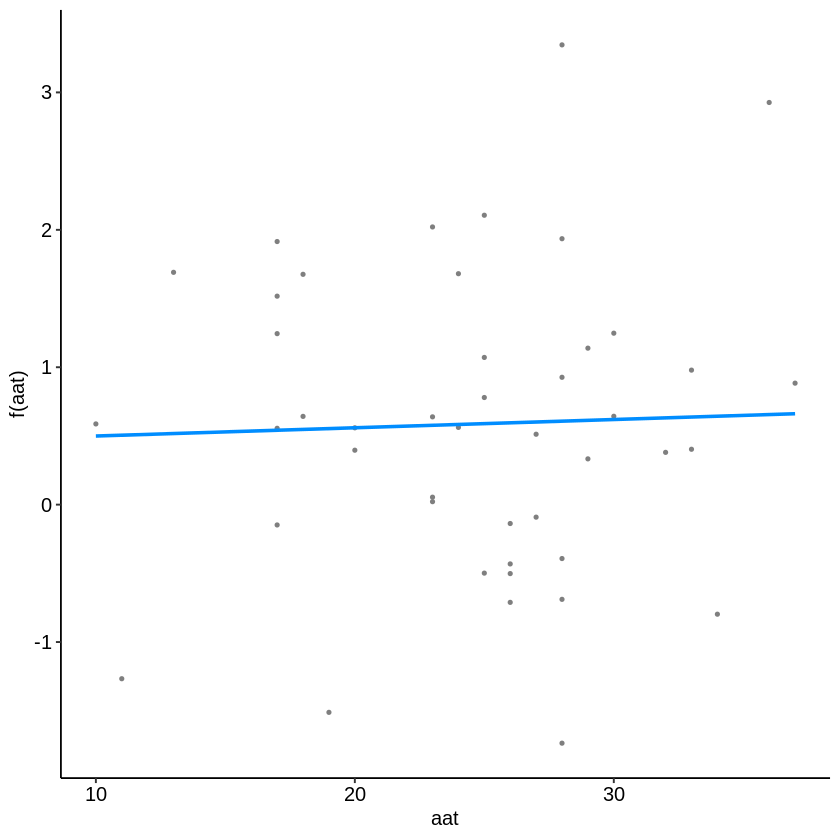

In [31]:
beta_malt <- betareg(fngc ~ aat + obt + dbt + nrt + njt + stai, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()    

In [32]:
avg_slopes(beta_malt, variables = "obt")
avg_slopes(beta_malt, variables = "aat")
avg_slopes(beta_malt, variables = "stai")

term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
obt,-0.00459,0.00453,-1.01,0.311,1.68,-0.0135,0.00429


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aat,0.00137,0.00473,0.289,0.773,0.372,-0.0079,0.0106


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stai,0.00108,0.00301,0.361,0.718,0.478,-0.00481,0.00697


# Bayesian Beta Reg

In [33]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai)

## Main - Control

In [34]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc~obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.72      1.26    -1.73     3.20 1.00    24985    22292
obt          -0.05      0.02    -0.09    -0.02 1.00    27709    22884
aat           0.05      0.02     0.02     0.09 1.00    26796    23114
dbt           0.01      0.01    -0.01     0.04 1.00    30174    23879
nrt           0.01      0.03    -0.05     0.06 1.00    24949    24111
njt           0.01      0.02    -0.02     0.05 1.00    26115    22124
stai          0.03      0.01     0.01     0.06 1.00    23111    19845

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    76.96     17.45    46.65   114.85 1.00    26134    21753


Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.05      0.02    -0.08    -0.03          0         0     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.05      0.02    -0.08    -0.03       1031         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.05      0.02     0.02     0.08        332         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [35]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc~obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.01      1.65    -2.25     4.23 1.00    23909    22248
obt          -0.02      0.02    -0.06     0.02 1.00    30148    24611
aat           0.01      0.02    -0.04     0.05 1.00    27330    24535
dbt           0.02      0.02    -0.02     0.06 1.00    33070    24588
nrt          -0.02      0.03    -0.08     0.05 1.00    28772    23114
njt          -0.02      0.02    -0.06     0.03 1.00    26513    24159
stai          0.01      0.01    -0.02     0.03 1.00    23097    22795

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi     8.42      1.80     5.31    12.31 1.00    29297    24001

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.02      0.02    -0.06     0.01        0.2      0.16     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.02      0.02    -0.06     0.01       5.07      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.01      0.02    -0.03     0.04       1.51       0.6     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

# ERP

In [36]:
erp <- as.data.frame(read_csv("erp.csv"))

Rows: 37 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): ID, nGP3, nGP3SME, GP3, GP3SME, dP3, nGN2, nGN2SME, GN2, GN2SME, dN2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
test <- db[db[[1]] %in% erp[[1]], ]

obt <- test[["Observing Total"]]
dbt <- test[["Describing Total"]]
aat <- test[["ActAware Total"]]
nrt <- test[["Nonreactivity Total"]]
njt <- test[["Nonjudging Total"]]
stai <- test[["STAI Total"]]
ffmqt <- test[["FFMQ Total"]]

gc <- test[["Go Correct"]]
ngc <- test[["noGo Correct"]]
dgc <- test[["delta Go"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- qnorm(fgc)
zfr <- qnorm(fngw)
dprime <- zhr - zfr

nGP3 <- erp[[2]]
GP3 <- erp[[4]]
dP3 <- erp[[6]]

nGN2 <- erp[[7]]
GN2 <- erp[[9]]
dN2 <- erp[[11]]

sme1 <- erp[[3]]
sme2 <- erp[[5]]
sme3 <- erp[[8]]
sme4 <- erp[[10]]

In [38]:
# just to check if RMS(SME) is lower than SD total - indicates data is real and not due to variance 
xvar <- sme4
xvar2 <- GN2

rmssme <- sqrt(mean(xvar^2))
sdtotal <- sd(xvar2)

rmssme
sdtotal

[1] 0.542

[1] 3.42


Call:
betareg(formula = fgc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.704 -0.707 -0.127  0.738  2.152 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.992715   1.482470    0.67   0.5031   
dN2         -0.042853   0.164260   -0.26   0.7942   
aat          0.065364   0.029450    2.22   0.0265 * 
obt         -0.049535   0.019014   -2.61   0.0092 **
dbt          0.005397   0.014251    0.38   0.7049   
nrt         -0.002432   0.027145   -0.09   0.9286   
njt          0.011496   0.017294    0.66   0.5062   
stai         0.028410   0.010671    2.66   0.0078 **
dN2:aat      0.000939   0.005924    0.16   0.8741   

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     91.3       21.7    4.21  2.5e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 

36 
36

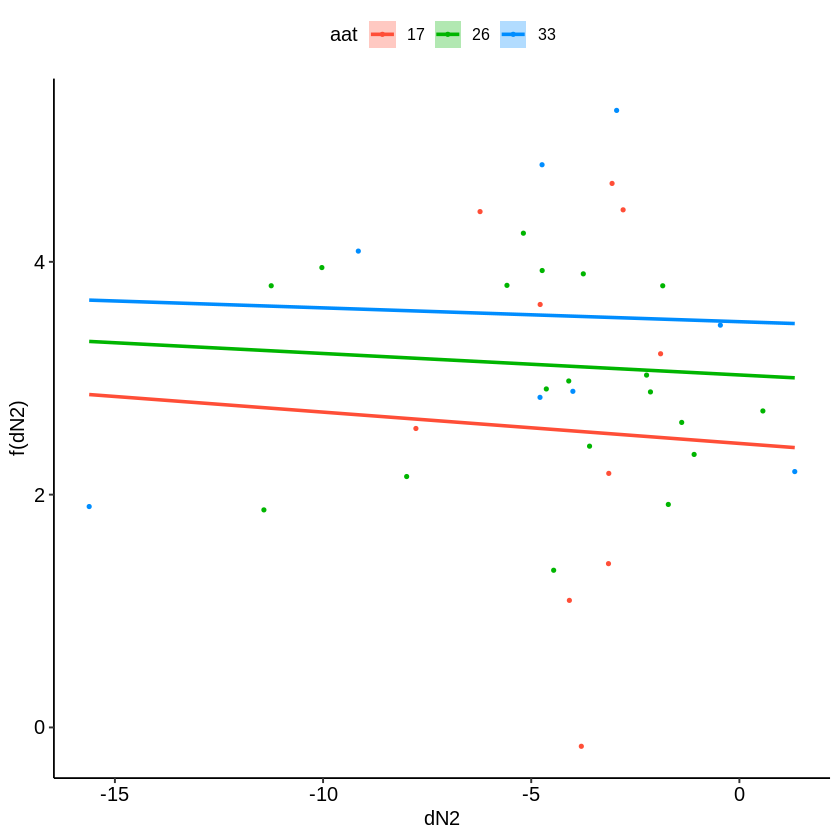

In [39]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(34, 32),]

beta_malt <- betareg(fgc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dN2", overlay = TRUE, gg = TRUE, by = "aat") + theme_pubr()

#aat not sig at all

which(cooks.distance(beta_malt) > 1)

In [40]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ dN2 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dN2:aat < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dN2) > 0    -0.01      0.01    -0.02     0.01       0.27      0.21     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0        0         0        0     0.01       0.01      0.01     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dN2:aat) < 0        0         0        0        0       0.23      0.19     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear and bayesian regression of delta P3 and mindfulness facets controlling for trait anxiety


Call:
lm(formula = dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.922 -2.249 -0.691  2.078  7.380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 20.07055   10.42633    1.92    0.064 .
aat          0.07712    0.14928    0.52    0.609  
obt         -0.17723    0.13944   -1.27    0.214  
dbt          0.11380    0.12191    0.93    0.358  
nrt         -0.39882    0.21740   -1.83    0.077 .
njt         -0.08386    0.14926   -0.56    0.579  
stai         0.00062    0.09463    0.01    0.995  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.09 on 29 degrees of freedom
Multiple R-squared:  0.232,	Adjusted R-squared:  0.0732 
F-statistic: 1.46 on 6 and 29 DF,  p-value: 0.226


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9583         0.1901 
Kolmogorov-Smirnov        0.096          0.8634 
Cramer-von Mises          3.1285         0.0000 
Anderson-Darling          0.5332         0.1611 
-----------------------------------------------

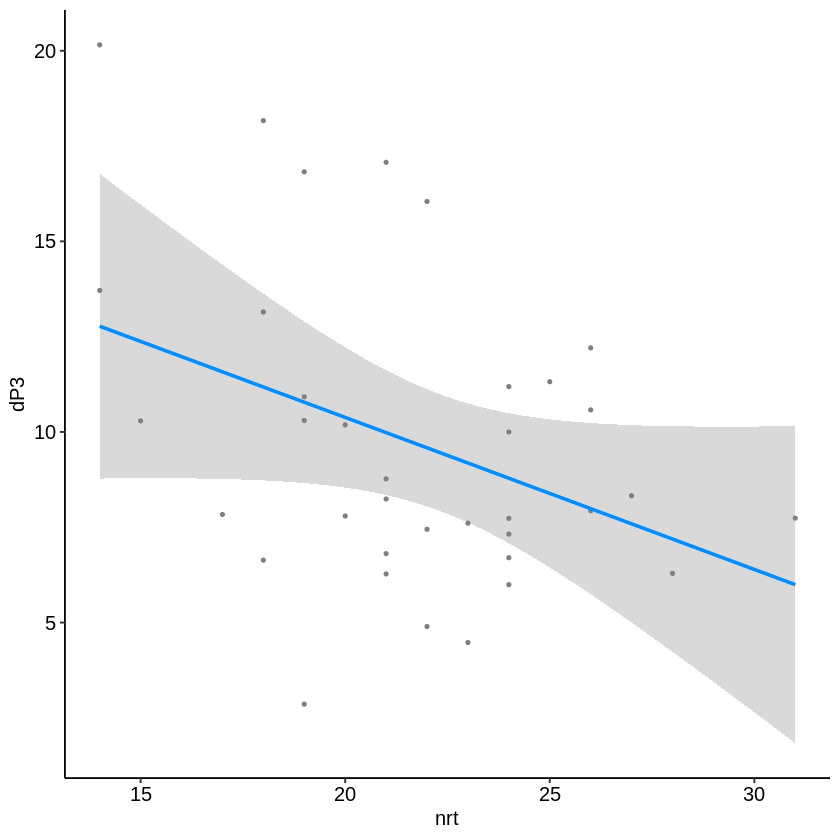

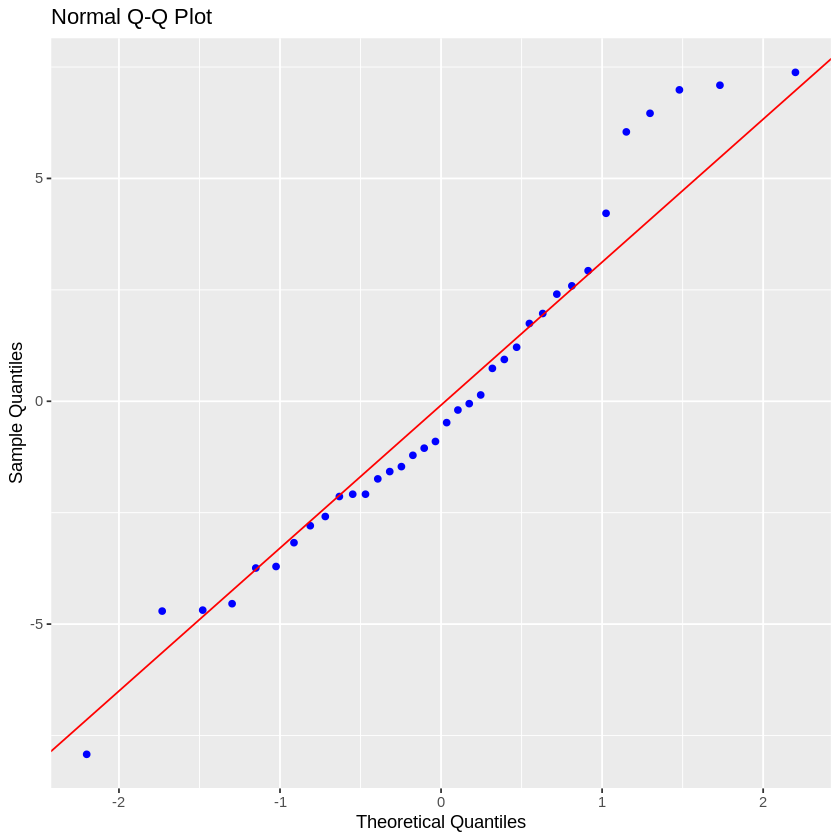


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : dP3 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  aat              0.5754     1    1.0000 
  obt              0.1062     1    1.0000 
  dbt              0.2033     1    1.0000 
  nrt              3.7103     1    0.3245 
  njt              0.6199     1    1.0000 
  stai             0.1299     1    1.0000 
 ----------------------------------------
  simultaneous     5.9850     6    0.4249 
 ----------------------------------------

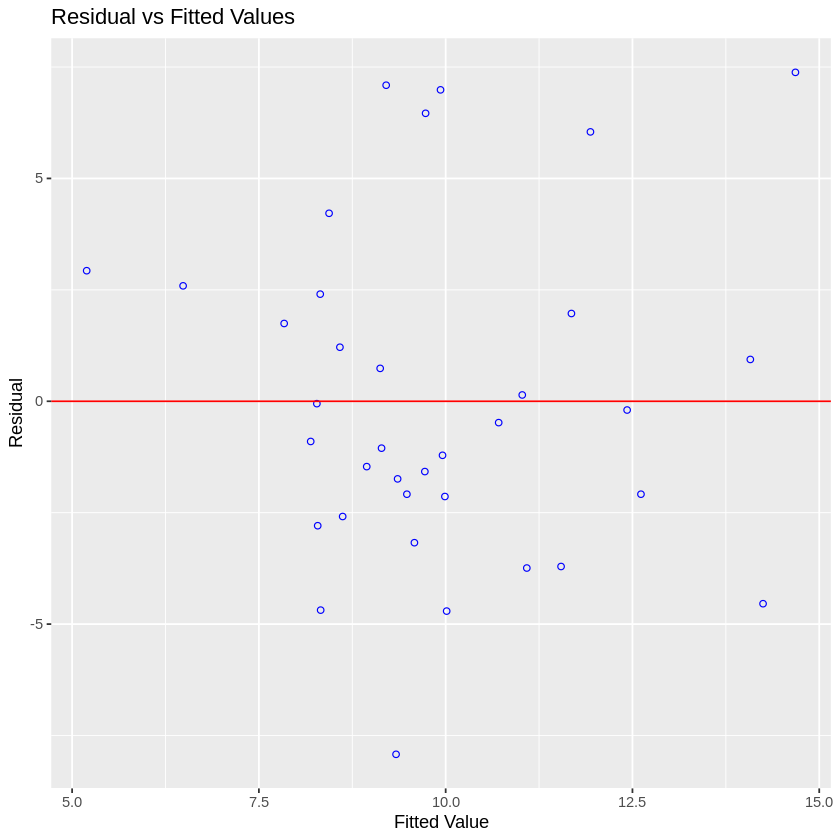

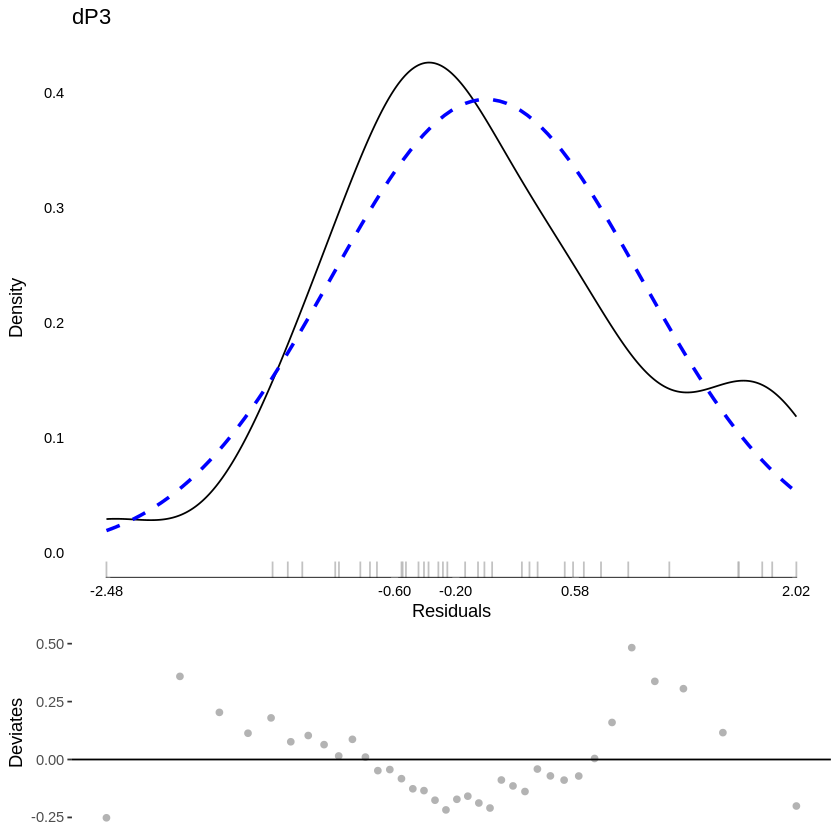

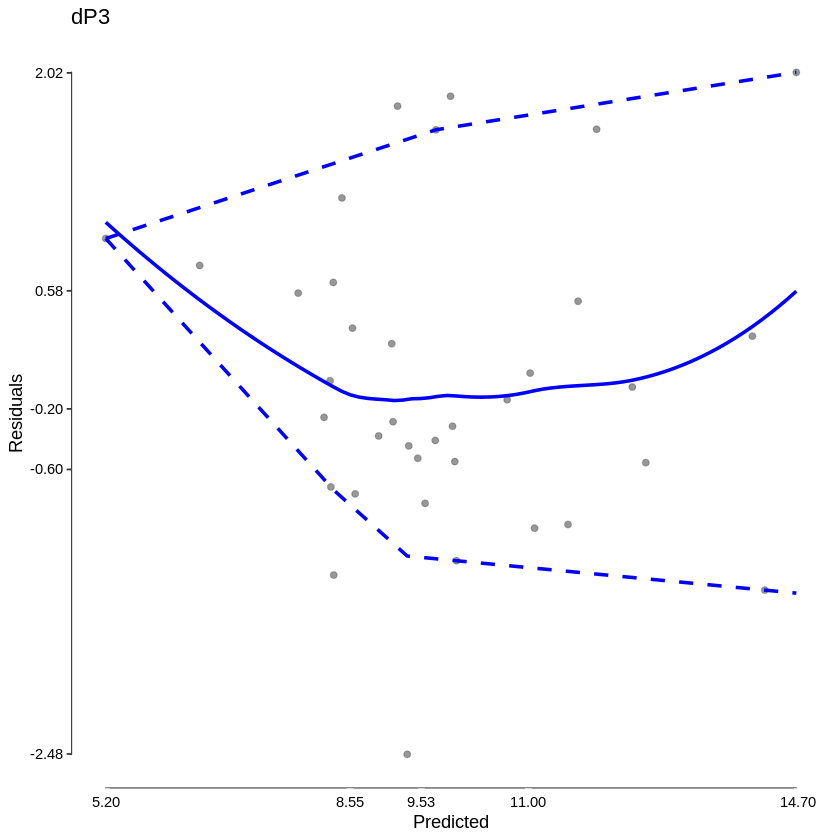

In [41]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

df <- df[-c(6), ]

malt <- lm(dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [42]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = dP3 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.18      0.14    -0.41     0.05       9.04       0.9     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0     0.07      0.15    -0.17     0.32       0.45      0.31     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.38      0.22    -0.74    -0.03       24.9      0.96    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear and bayesian rergression for GP3 and mindfulness facets controlling for trait anxiety


Call:
lm(formula = GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.51  -1.66  -0.11   2.73   5.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  19.3462     9.3120    2.08    0.046 *
aat          -0.0743     0.1333   -0.56    0.582  
obt           0.0267     0.1227    0.22    0.830  
dbt          -0.0884     0.1087   -0.81    0.423  
nrt          -0.0728     0.1930   -0.38    0.709  
njt          -0.0833     0.1306   -0.64    0.528  
stai         -0.1150     0.0847   -1.36    0.185  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.67 on 30 degrees of freedom
Multiple R-squared:  0.0766,	Adjusted R-squared:  -0.108 
F-statistic: 0.415 on 6 and 30 DF,  p-value: 0.863


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9594         0.1934 
Kolmogorov-Smirnov        0.0906         0.8948 
Cramer-von Mises          3.0324         0.0000 
Anderson-Darling          0.4142         0.3196 
-----------------------------------------------

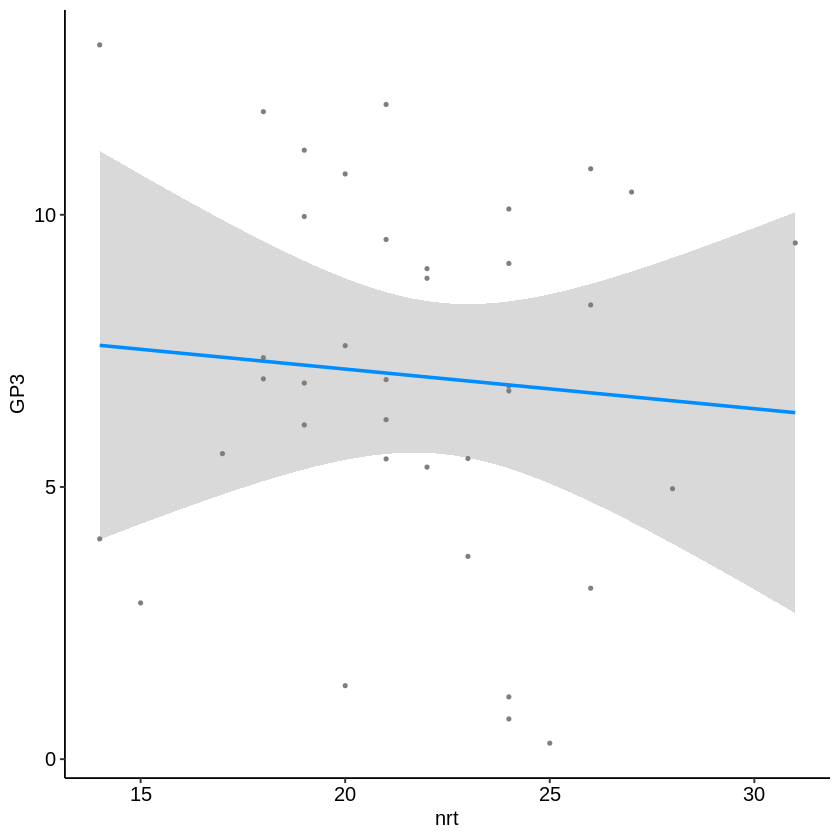

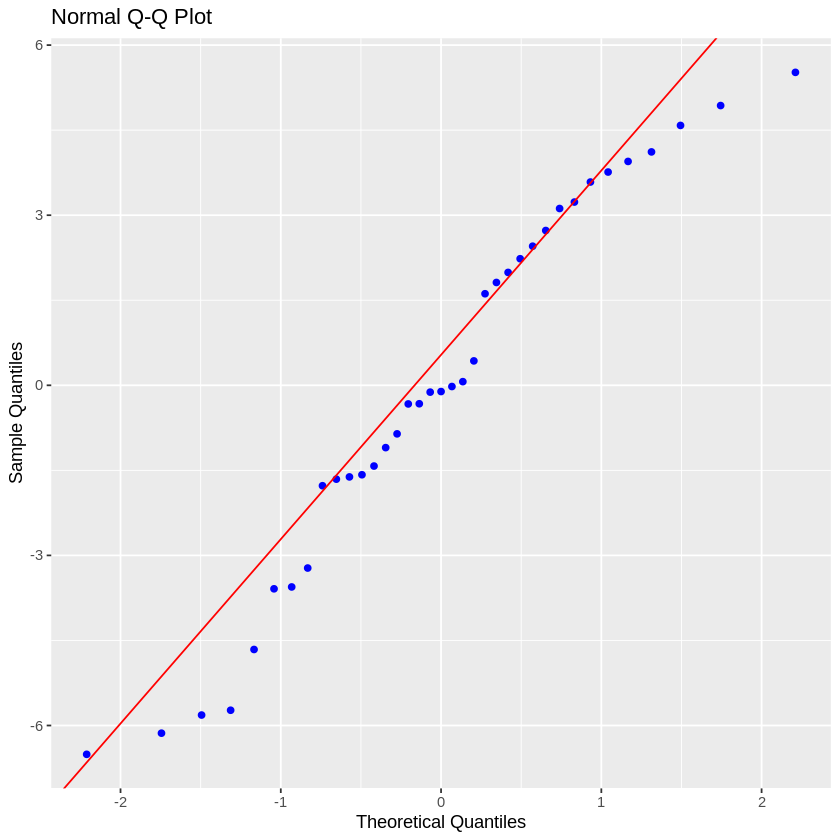


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : GP3 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  aat              1.94584     1    0.9782 
  obt              0.17786     1    1.0000 
  dbt              0.09297     1    1.0000 
  nrt              0.00712     1    1.0000 
  njt              0.26599     1    1.0000 
  stai             1.04798     1    1.0000 
 -----------------------------------------
  simultaneous     2.86973     6    0.8250 
 -----------------------------------------

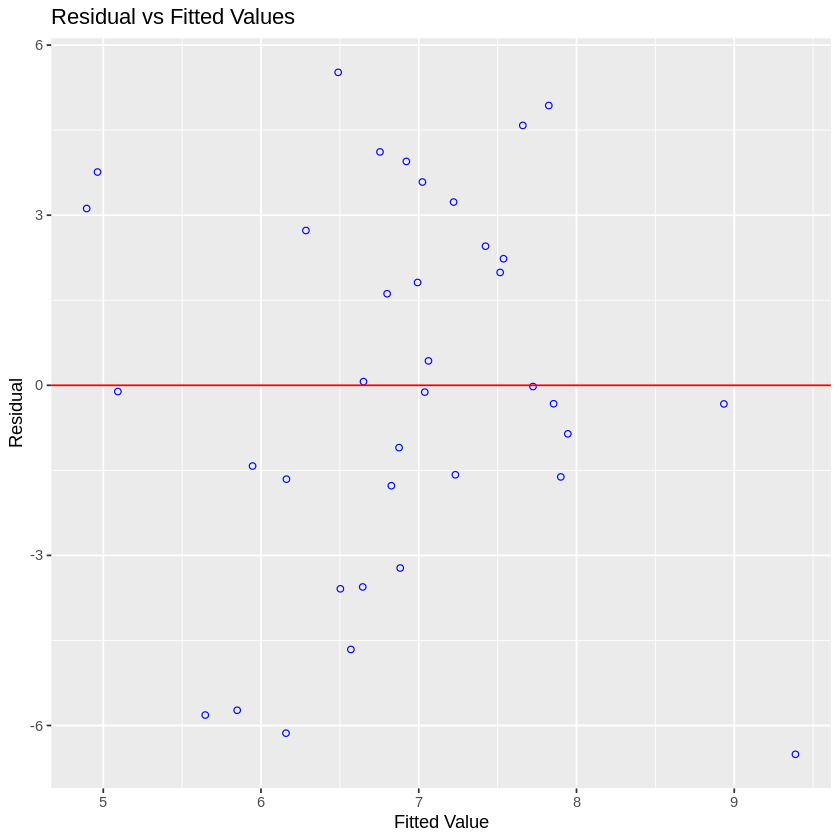

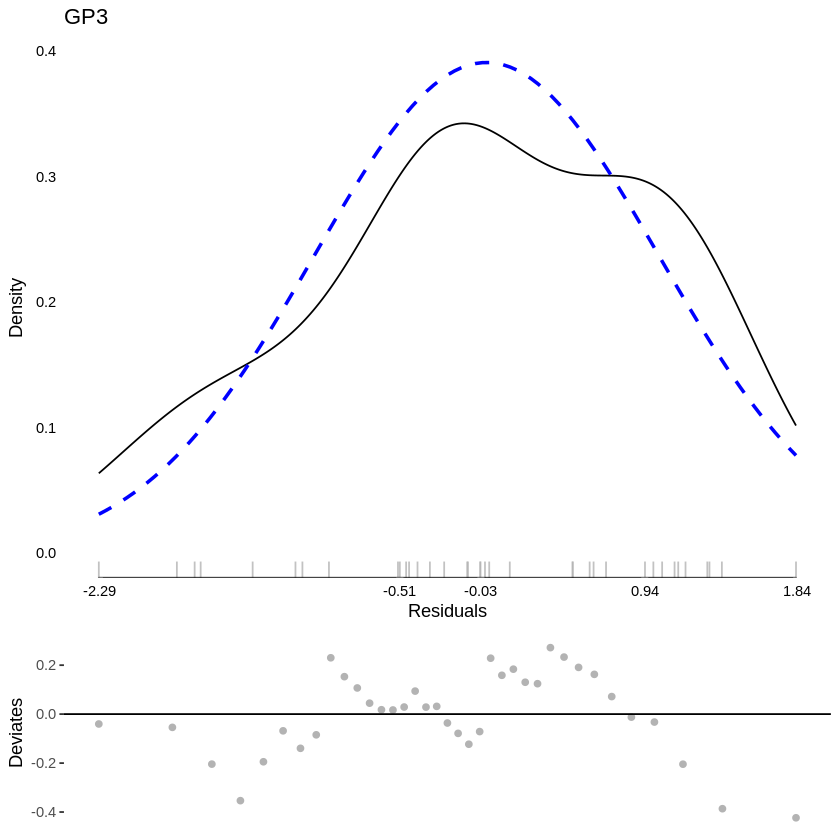

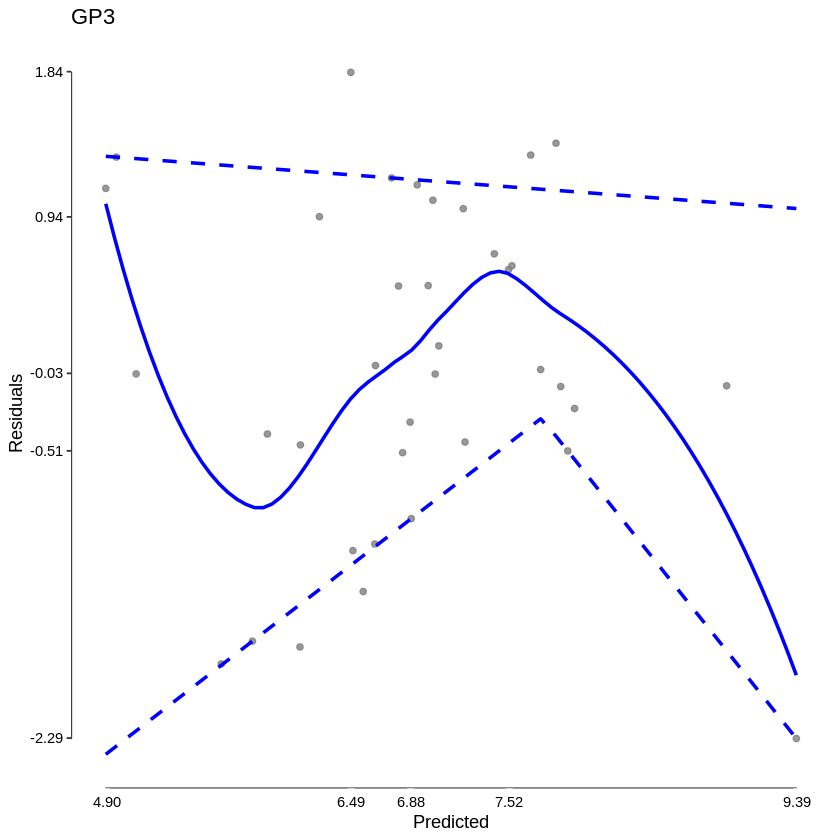

In [43]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [44]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = GP3 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0     0.03      0.13    -0.18     0.23       0.71      0.42     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.07      0.13    -0.29     0.15       2.43      0.71     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.07      0.19    -0.39     0.25       1.86      0.65     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear rergression for dN2 and mindfulness facets controlling for train anxiety


Call:
lm(formula = dN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.712 -1.760  0.068  2.282  6.518 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -12.1048     8.0971   -1.49     0.15  
aat          -0.1635     0.1159   -1.41     0.17  
obt           0.2623     0.1067    2.46     0.02 *
dbt           0.0300     0.0945    0.32     0.75  
nrt           0.1999     0.1678    1.19     0.24  
njt           0.0534     0.1135    0.47     0.64  
stai         -0.0262     0.0736   -0.36     0.72  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.19 on 30 degrees of freedom
Multiple R-squared:  0.307,	Adjusted R-squared:  0.169 
F-statistic: 2.22 on 6 and 30 DF,  p-value: 0.0689


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9762         0.6008 
Kolmogorov-Smirnov        0.1266         0.5510 
Cramer-von Mises          2.1994         0.0000 
Anderson-Darling          0.4018         0.3423 
-----------------------------------------------

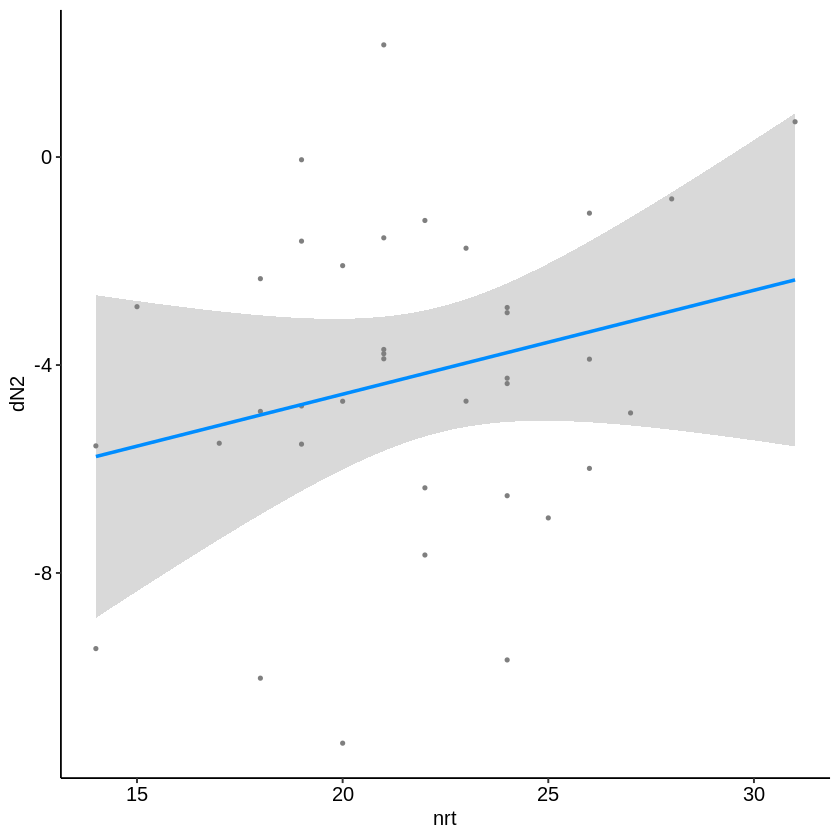

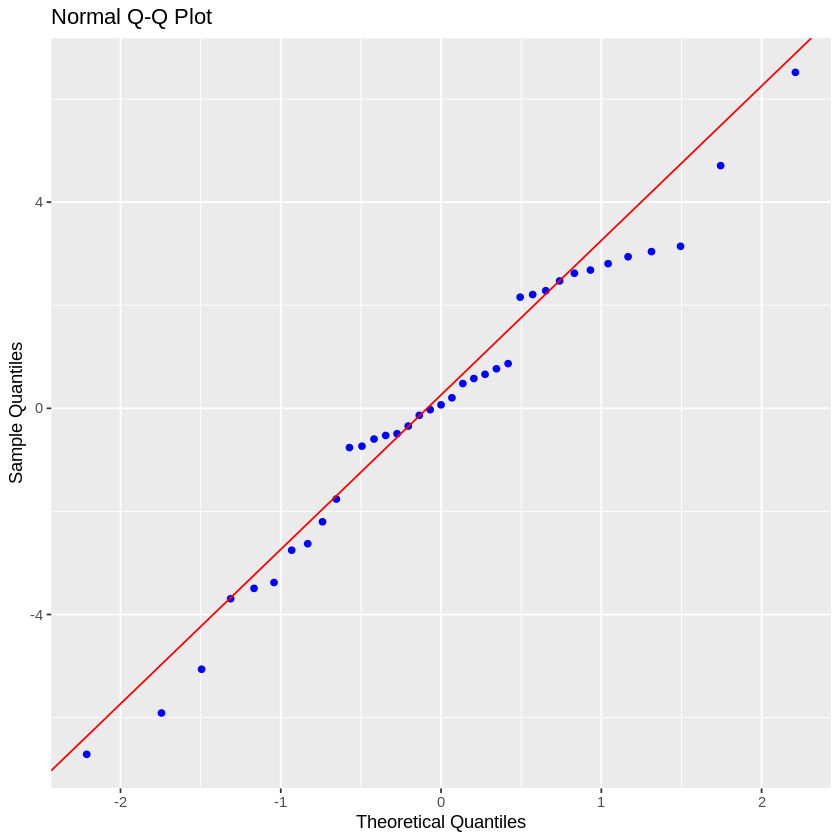


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : dN2 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  aat              2.7167     1    0.5958 
  obt              1.0665     1    1.0000 
  dbt              0.0332     1    1.0000 
  nrt              0.2092     1    1.0000 
  njt              0.0986     1    1.0000 
  stai             0.0509     1    1.0000 
 ----------------------------------------
  simultaneous     6.0249     6    0.4204 
 ----------------------------------------

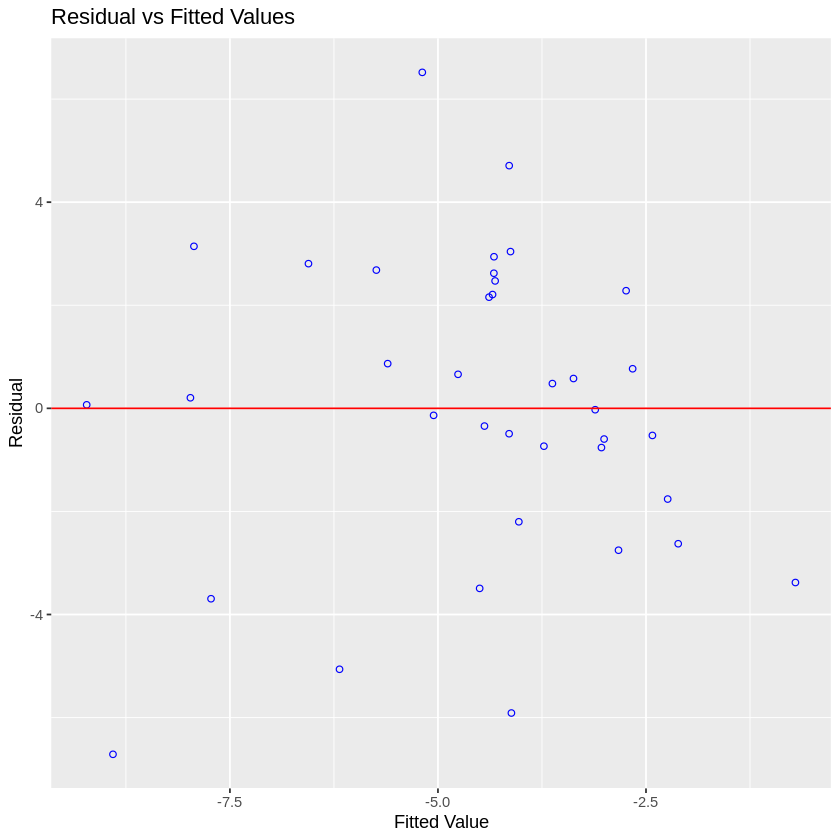

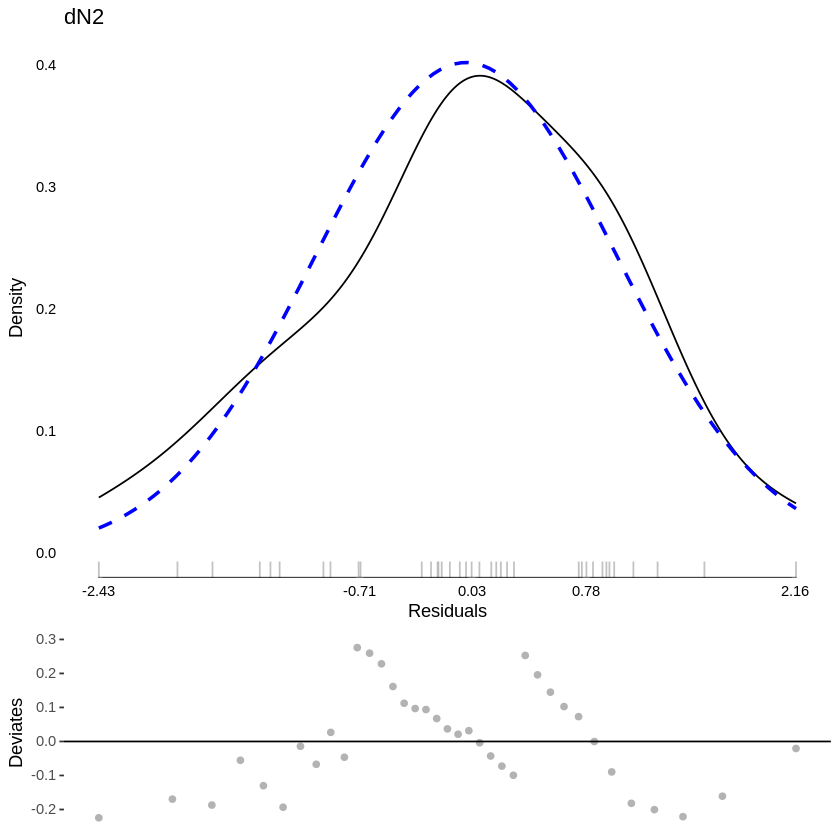

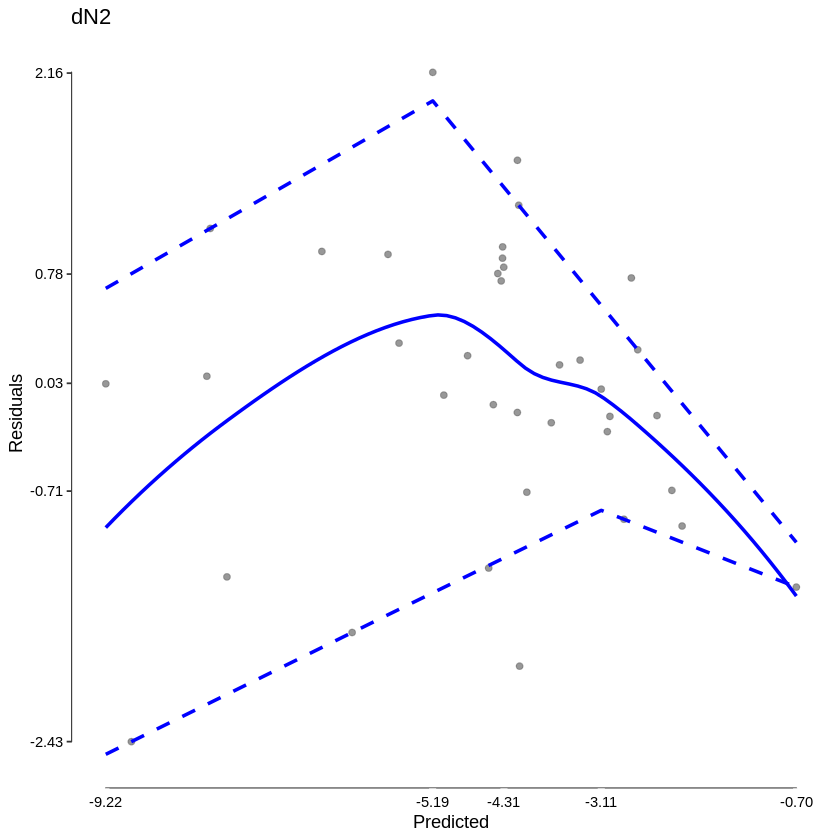

In [45]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(dN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [46]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = dN2 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0     0.26      0.11     0.08     0.44       99.6      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.16      0.12    -0.35     0.03       10.8      0.91     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0     0.19      0.17    -0.09     0.47       0.14      0.13     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear rergression for GN2 and mindfulness facets controlling for train anxiety


Call:
lm(formula = GN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.409 -1.831 -0.313  1.883  8.216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.6793     8.1052    0.45     0.65  
aat           0.0488     0.1161    0.42     0.68  
obt          -0.2435     0.1068   -2.28     0.03 *
dbt          -0.0164     0.0946   -0.17     0.86  
nrt          -0.0665     0.1680   -0.40     0.69  
njt           0.1101     0.1136    0.97     0.34  
stai          0.0359     0.0737    0.49     0.63  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.19 on 30 degrees of freedom
Multiple R-squared:  0.275,	Adjusted R-squared:  0.13 
F-statistic:  1.9 on 6 and 30 DF,  p-value: 0.114


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9776         0.6466 
Kolmogorov-Smirnov        0.097          0.8439 
Cramer-von Mises          3.2634         0.0000 
Anderson-Darling          0.3303         0.5042 
-----------------------------------------------

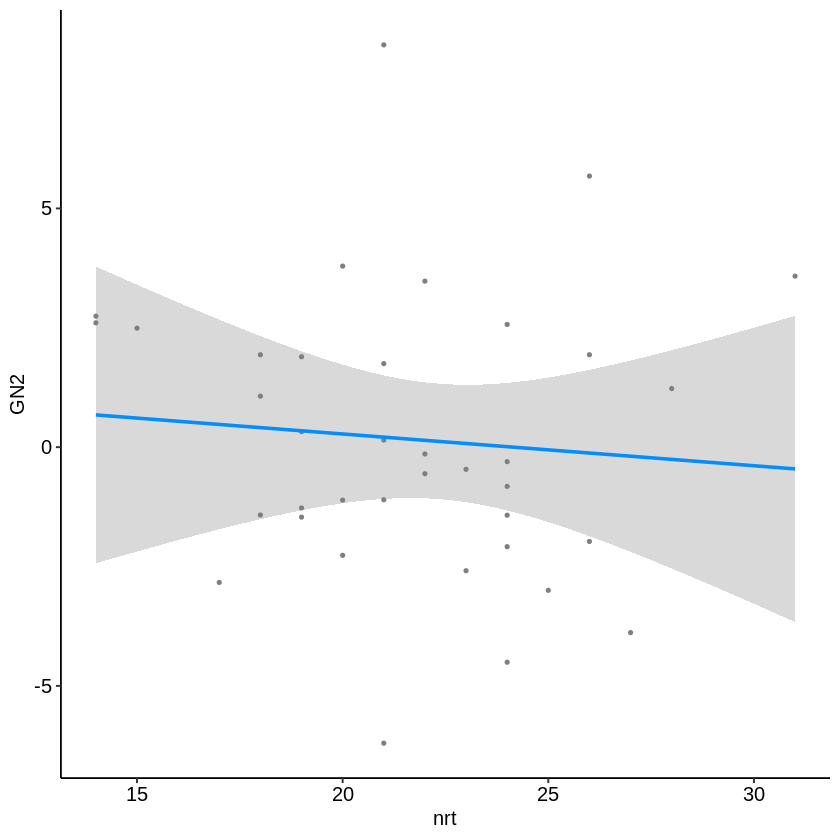

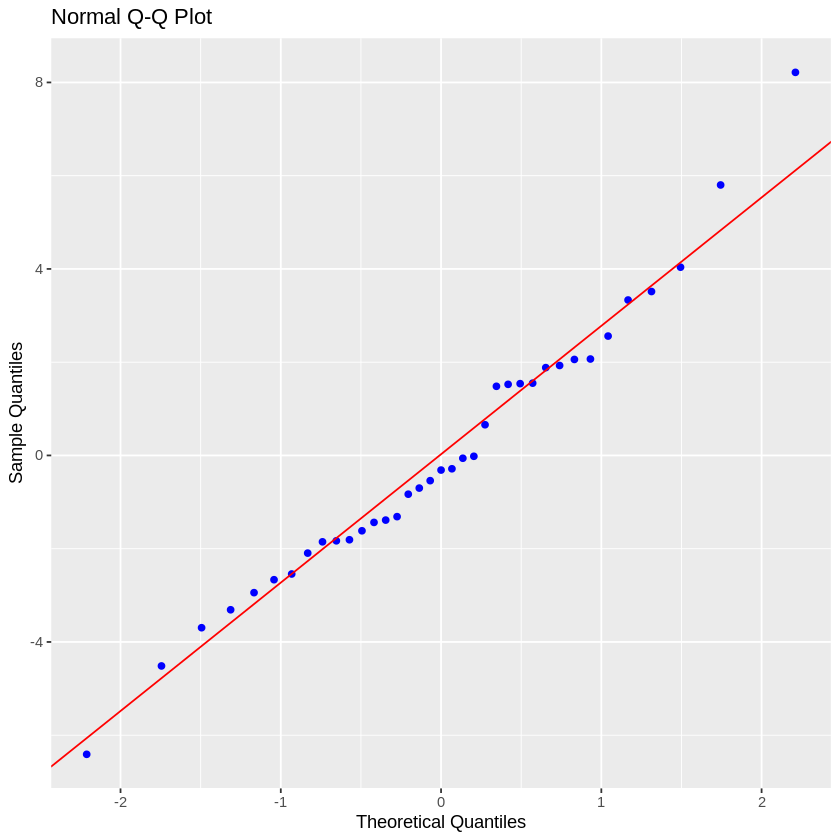


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : GN2 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  aat              0.3963     1    1.0000 
  obt              0.0270     1    1.0000 
  dbt              0.0513     1    1.0000 
  nrt              0.9748     1    1.0000 
  njt              0.8143     1    1.0000 
  stai             0.0990     1    1.0000 
 ----------------------------------------
  simultaneous     4.8225     6    0.5668 
 ----------------------------------------

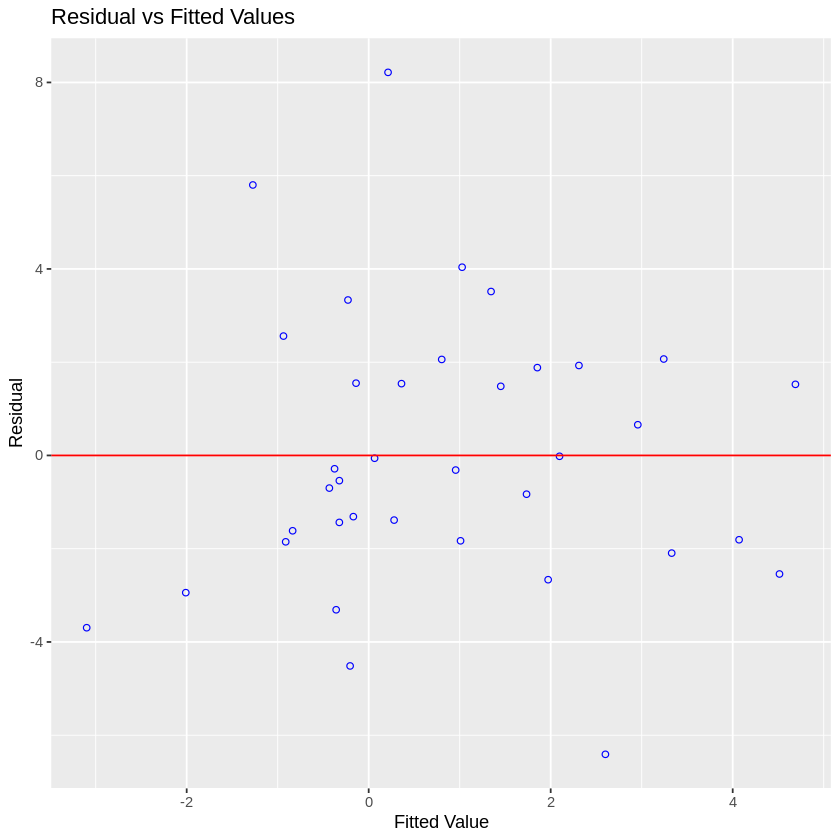

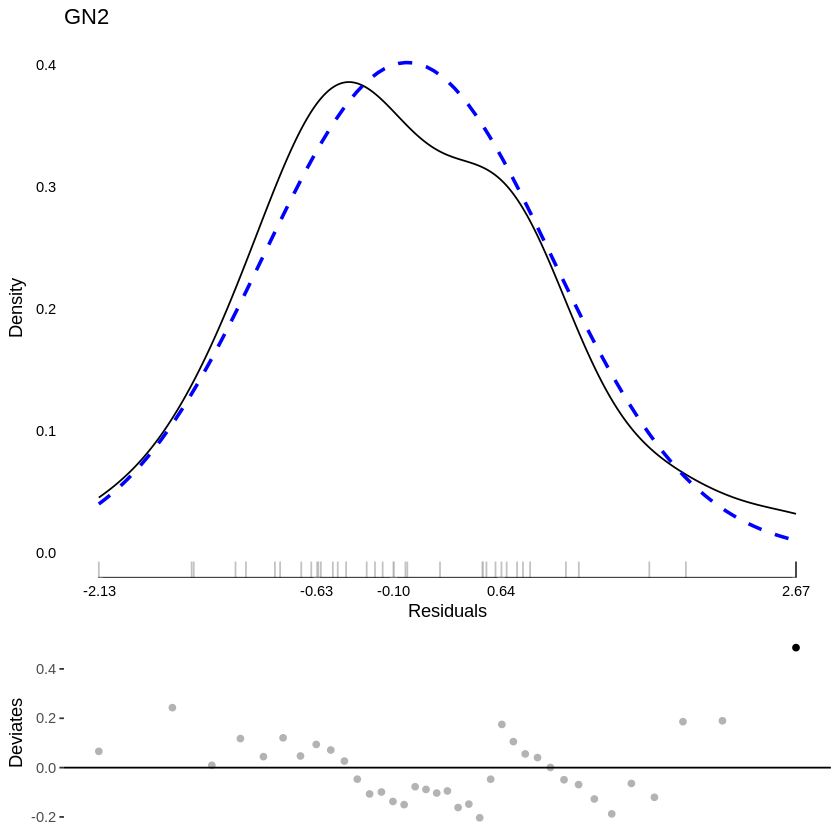

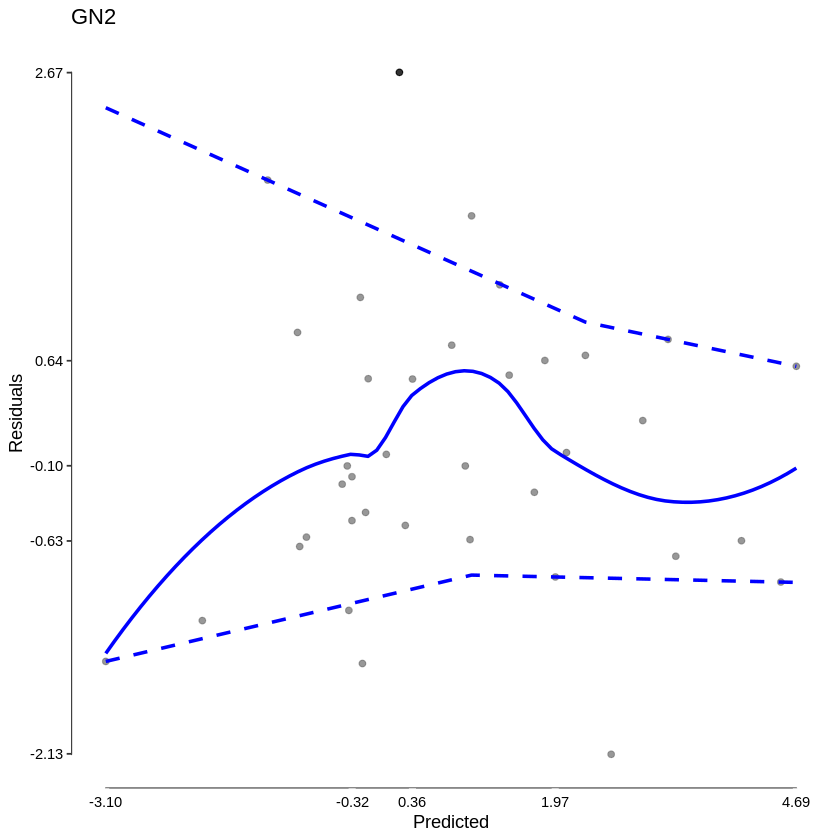

In [47]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(GN2 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [48]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = GN2 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.24      0.11    -0.42    -0.06         70      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.05      0.12    -0.15     0.24       1.91      0.66     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.07      0.17    -0.34     0.21        1.9      0.65     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta P3 * Observing and no-Go Accuracy


Call:
betareg(formula = fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.781 -0.723 -0.175  0.783  3.040 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  6.31998    2.27057    2.78   0.0054 **
dP3         -0.42726    0.13869   -3.08   0.0021 **
obt         -0.18001    0.06135   -2.93   0.0033 **
aat          0.02579    0.02106    1.22   0.2207   
dbt          0.01490    0.01669    0.89   0.3722   
nrt         -0.06739    0.03276   -2.06   0.0397 * 
njt         -0.02412    0.02040   -1.18   0.2371   
stai         0.00428    0.01308    0.33   0.7432   
dP3:obt      0.01591    0.00533    2.98   0.0028 **

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    13.11       2.95    4.44    9e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Typ

named integer(0)

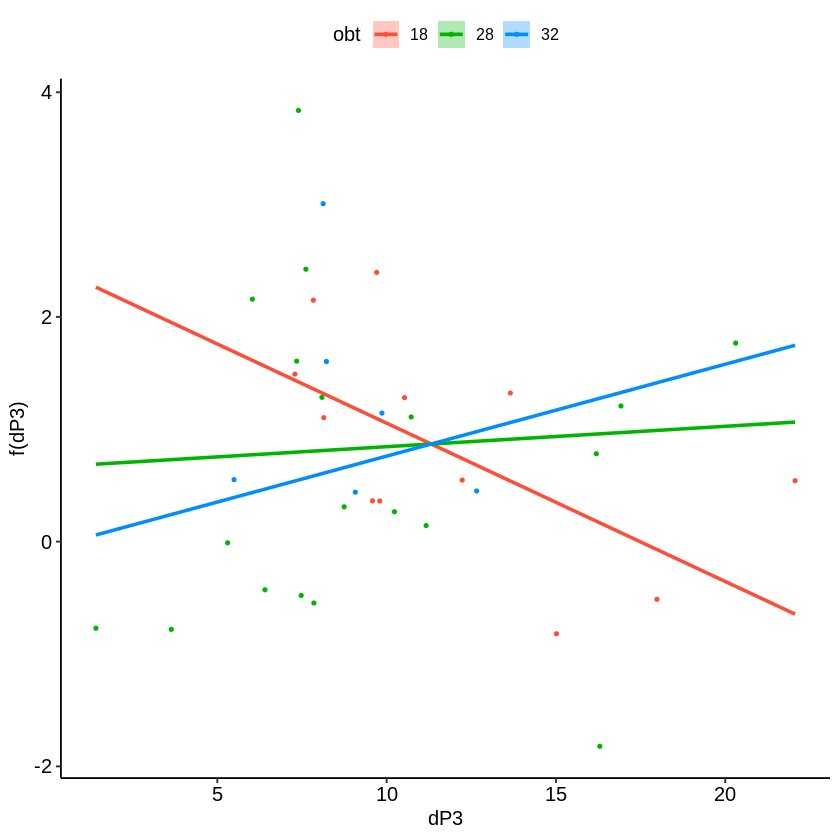

In [49]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

beta_malt <- betareg(fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [69]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dP3 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dP3:obt > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     6.19      2.55     1.15    11.20 1.00    14840    18459
dP3          -0.42      0.16    -0.73    -0.11 1.00    12277    15970
obt          -0.18      0.07    -0.31    -0.04 1.00    12581    17733
aat           0.03      0.03    -0.02     0.08 1.00    22389    21372
dbt           0.02      0.02    -0.02     0.06 1.00    28453    23164
nrt          -0.07      0.04    -0.14     0.01 1.00    26746    21972
njt          -0.02      0.02    -0.07     0.03 1.00    23028    21833
stai          0.00      0.02    -0.03     0.03 1.00    21765    21177
dP3:obt       0.02      0.01     0.00     0.03 1.00    12315    16250

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dP3) < 0    -0.42      0.16    -0.68    -0.16        202         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.18      0.07    -0.29    -0.06        178      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dP3:obt) > 0     0.02      0.01     0.01     0.03        160      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [51]:
library(emmeans)
zvals <- c(mean(df$obt) - sd(df$obt), mean(df$obt), mean(df$obt) + sd(df$obt))
emtrends(beta_malt, specs = "obt", var = "dP3", at = list(obt = zvals))

emtrends(beta_malt, specs = "obt", var = "dP3", at = list(obt = zvals)) |> test()

  obt dP3.trend      SE  df asymp.LCL asymp.UCL
 20.2  -0.02206 0.00727 Inf   -0.0363   -0.0078
 25.9  -0.00314 0.00501 Inf   -0.0130    0.0067
 31.7   0.01730 0.00878 Inf    0.0001    0.0345

Confidence level used: 0.95 

,obt,dP3.trend,SE,df,z.ratio,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.2,-0.02206,0.00727,Inf,-3.036,0.0024
2,25.9,-0.00314,0.00501,Inf,-0.627,0.5308
3,31.7,0.01730,0.00878,Inf,1.970,0.0488


### Beta regression of Go P3 * Observing and Go Accuracy


Call:
betareg(formula = fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.152 -0.702 -0.108  0.809  2.326 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -3.89e-01   1.52e+00   -0.26    0.798  
GP3          1.99e-01   1.07e-01    1.86    0.063 .
obt          2.58e-02   3.41e-02    0.76    0.449  
aat          3.43e-02   1.94e-02    1.77    0.076 .
dbt          4.18e-04   1.54e-02    0.03    0.978  
nrt          2.59e-05   2.50e-02    0.00    0.999  
njt          3.56e-02   2.03e-02    1.75    0.081 .
stai         2.81e-02   1.17e-02    2.41    0.016 *
GP3:obt     -7.89e-03   4.17e-03   -1.89    0.058 .

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    129.2       31.4    4.12  3.8e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type

named integer(0)

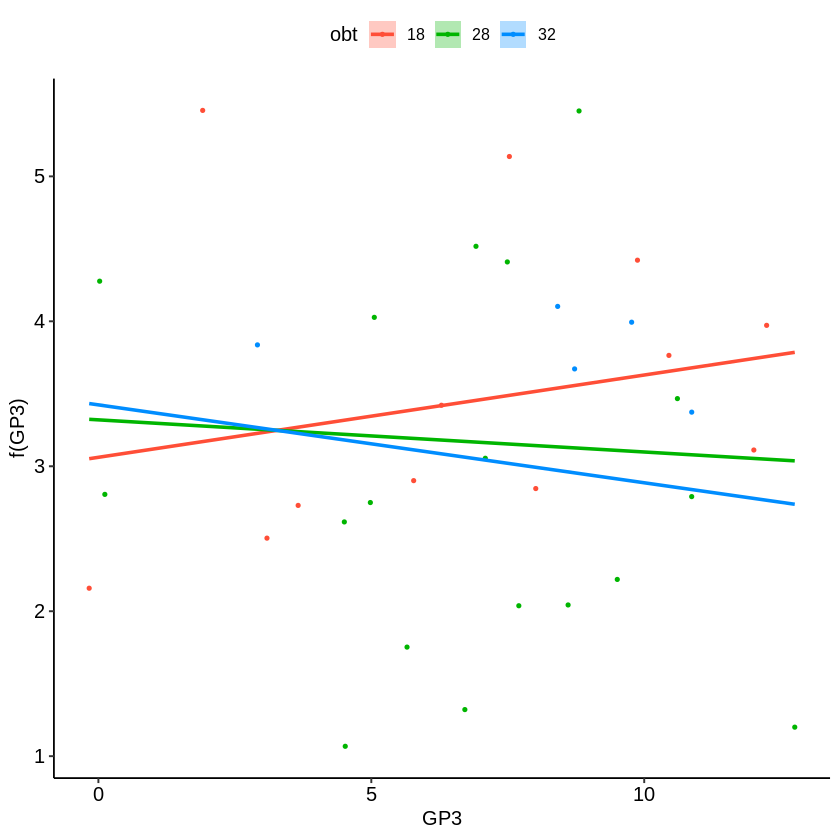

In [52]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34, 36), ]

beta_malt <- betareg(fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [53]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GP3 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GP3:obt < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 35) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.29      1.92    -3.99     3.53 1.00    18855    19618
GP3           0.19      0.13    -0.08     0.44 1.00    14965    18008
obt           0.02      0.04    -0.07     0.10 1.00    15680    19146
aat           0.04      0.02    -0.01     0.08 1.00    25086    21818
dbt           0.00      0.02    -0.04     0.04 1.00    26003    20797
nrt           0.00      0.03    -0.06     0.06 1.00    30844    23122
njt           0.03      0.02    -0.01     0.08 1.00    22267    21476
stai          0.03      0.01    -0.00     0.06 1.00    20720    20725
GP3:obt      -0.01      0.01    -0.02     0.00 1.00    14830    17499

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GP3) > 0     0.19      0.13    -0.03      0.4       11.5      0.92     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0     0.02      0.04    -0.05     0.09       2.32       0.7     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GP3:obt) < 0    -0.01      0.01    -0.02        0       12.8      0.93     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [54]:
library(emmeans)
zvals <- c(mean(df$obt) - sd(df$obt), mean(df$obt), mean(df$obt) + sd(df$obt))
emtrends(beta_malt, specs = "obt", var = "GP3", at = list(obt = zvals))

emtrends(beta_malt, specs = "obt", var = "GP3", at = list(obt = zvals)) |> test()

  obt GP3.trend       SE  df asymp.LCL asymp.UCL
 19.9  0.001233 0.000969 Inf  -0.00067  0.003133
 25.7 -0.000152 0.000891 Inf  -0.00190  0.001594
 31.6 -0.002041 0.001491 Inf  -0.00496  0.000881

Confidence level used: 0.95 

,obt,GP3.trend,SE,df,z.ratio,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19.9,0.001233,0.000969,Inf,1.27,0.203
2,25.7,-0.000152,0.000891,Inf,-0.17,0.865
3,31.5,-0.002041,0.001491,Inf,-1.37,0.171


### Beta regression of delta P3 * Acting with Awareness and no-Go Accuracy


Call:
betareg(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.464 -0.766 -0.117  0.702  2.825 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.687085   2.227523    1.21     0.23
dP3         -0.122539   0.120379   -1.02     0.31
aat         -0.032304   0.055835   -0.58     0.56
obt         -0.012930   0.021227   -0.61     0.54
dbt          0.022491   0.018170    1.24     0.22
nrt         -0.040753   0.034401   -1.18     0.24
njt         -0.017679   0.024115   -0.73     0.46
stai        -0.000679   0.014186   -0.05     0.96
dP3:aat      0.004263   0.004890    0.87     0.38

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    10.69       2.39    4.47  7.8e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (

named integer(0)

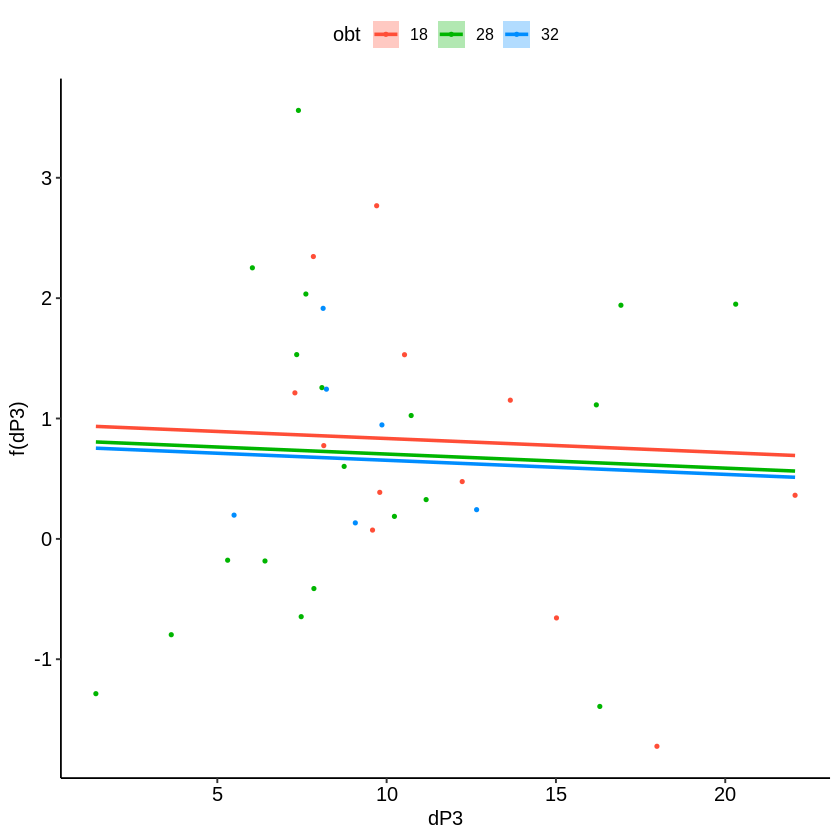

In [55]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [56]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dP3 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dP3:aat > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     2.79      2.59    -2.30     7.94 1.00    13392    17592
dP3          -0.14      0.15    -0.45     0.16 1.00    11781    16438
aat          -0.04      0.07    -0.18     0.09 1.00    11853    16663
obt          -0.01      0.03    -0.06     0.03 1.00    21040    21580
dbt           0.02      0.02    -0.02     0.07 1.00    29179    22559
nrt          -0.04      0.04    -0.12     0.04 1.00    25233    21752
njt          -0.02      0.03    -0.07     0.04 1.00    18401    19773
stai          0.00      0.02    -0.03     0.03 1.00    21529    21300
dP3:aat       0.00      0.01    -0.01     0.02 1.00    11574    16101

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dP3) < 0    -0.14      0.15    -0.39     0.11       4.49      0.82     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.04      0.07    -0.15     0.07       2.45      0.71     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dP3:aat) > 0        0      0.01    -0.01     0.02       3.61      0.78     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go P3 * Acting with Awareness and Go Accuracy


Call:
betareg(formula = fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.646 -0.979 -0.228  0.891  2.818 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  3.32183    1.58663    2.09   0.0363 * 
GP3         -0.11423    0.09667   -1.18   0.2373   
aat          0.02012    0.03333    0.60   0.5462   
obt         -0.04843    0.01874   -2.58   0.0098 **
dbt         -0.01016    0.01707   -0.59   0.5519   
nrt          0.00809    0.02855    0.28   0.7769   
njt          0.00126    0.01689    0.07   0.9404   
stai         0.01591    0.01227    1.30   0.1948   
GP3:aat      0.00392    0.00392    1.00   0.3179   

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     96.2       23.1    4.16  3.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type

36 
35

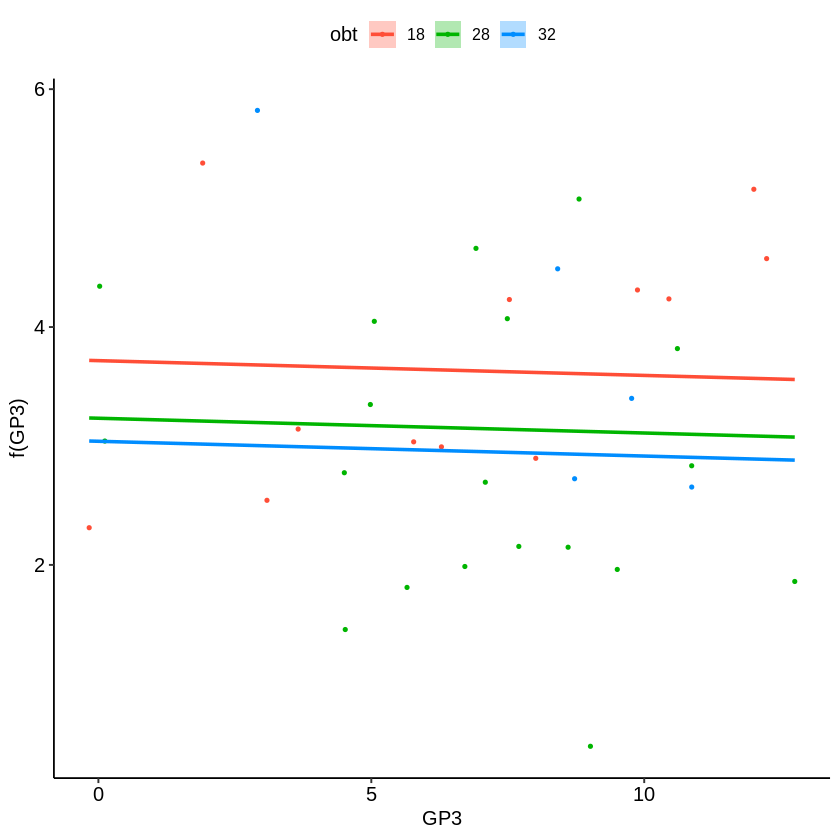

In [57]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34), ]

beta_malt <- betareg(fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [58]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GP3 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GP3:aat < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 36) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     3.16      1.92    -0.66     6.93 1.00    20381    18933
GP3          -0.11      0.10    -0.30     0.10 1.00    18438    18197
aat           0.02      0.04    -0.05     0.10 1.00    19710    18968
obt          -0.05      0.02    -0.09    -0.01 1.00    25814    21984
dbt          -0.01      0.02    -0.05     0.03 1.00    24761    20649
nrt           0.01      0.03    -0.06     0.08 1.00    26522    22246
njt           0.00      0.02    -0.04     0.05 1.00    22489    20397
stai          0.02      0.02    -0.01     0.05 1.00    21469    21219
GP3:aat       0.00      0.00    -0.00     0.01 1.00    18205    18370

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GP3) > 0    -0.11       0.1    -0.27     0.07       0.17      0.15     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.02      0.04    -0.04     0.08       2.43      0.71     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GP3:aat) < 0        0         0        0     0.01       0.22      0.18     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta N2 * Observing and no-Go Accuracy


Call:
betareg(formula = fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.216 -0.785  0.022  0.859  2.711 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.964568   1.802461    0.54     0.59
dN2         -0.011778   0.142213   -0.08     0.93
obt         -0.004286   0.039044   -0.11     0.91
aat          0.006645   0.024083    0.28     0.78
dbt          0.020261   0.018237    1.11     0.27
nrt         -0.032111   0.034460   -0.93     0.35
njt         -0.010492   0.021905   -0.48     0.63
stai        -0.000969   0.014291   -0.07     0.95
dN2:obt     -0.000390   0.005975   -0.07     0.95

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    10.44       2.33    4.48  7.6e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (

named integer(0)

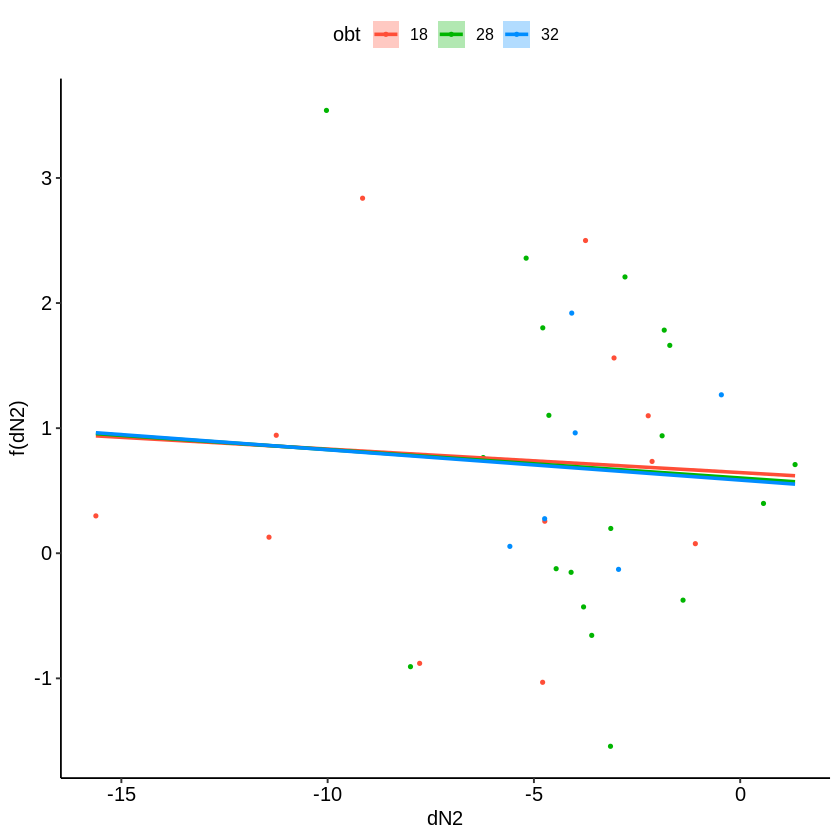

In [59]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [60]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dN2 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dN2:obt > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dN2 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.80      2.11    -3.42     4.94 1.00    23542    22887
dN2          -0.03      0.17    -0.38     0.30 1.00    15143    17786
obt          -0.00      0.05    -0.09     0.09 1.00    17236    20394
aat           0.01      0.03    -0.05     0.06 1.00    25851    23187
dbt           0.02      0.02    -0.02     0.06 1.00    35018    23177
nrt          -0.03      0.04    -0.11     0.05 1.00    30223    22193
njt          -0.01      0.03    -0.06     0.04 1.00    28826    22042
stai         -0.00      0.02    -0.03     0.03 1.00    28275    22371
dN2:obt       0.00      0.01    -0.01     0.01 1.00    15566    18355

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dN2) < 0    -0.03      0.17    -0.31     0.24       1.23      0.55     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0        0      0.05    -0.08     0.07        0.9      0.47     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dN2:obt) > 0        0      0.01    -0.01     0.01          1       0.5     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go N2 * Observing and Go Accuracy


Call:
betareg(formula = fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.943 -0.894 -0.023  0.797  2.208 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.48607    1.37903    1.08     0.28
GN2          0.16891    0.17682    0.96     0.34
obt         -0.01872    0.02756   -0.68     0.50
aat          0.03433    0.02136    1.61     0.11
dbt         -0.01451    0.01874   -0.77     0.44
nrt          0.01399    0.02895    0.48     0.63
njt          0.01567    0.01890    0.83     0.41
stai         0.01927    0.01191    1.62     0.11
GN2:obt     -0.00582    0.00618   -0.94     0.35

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     91.5       22.3     4.1  4.1e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum lik

36 
34

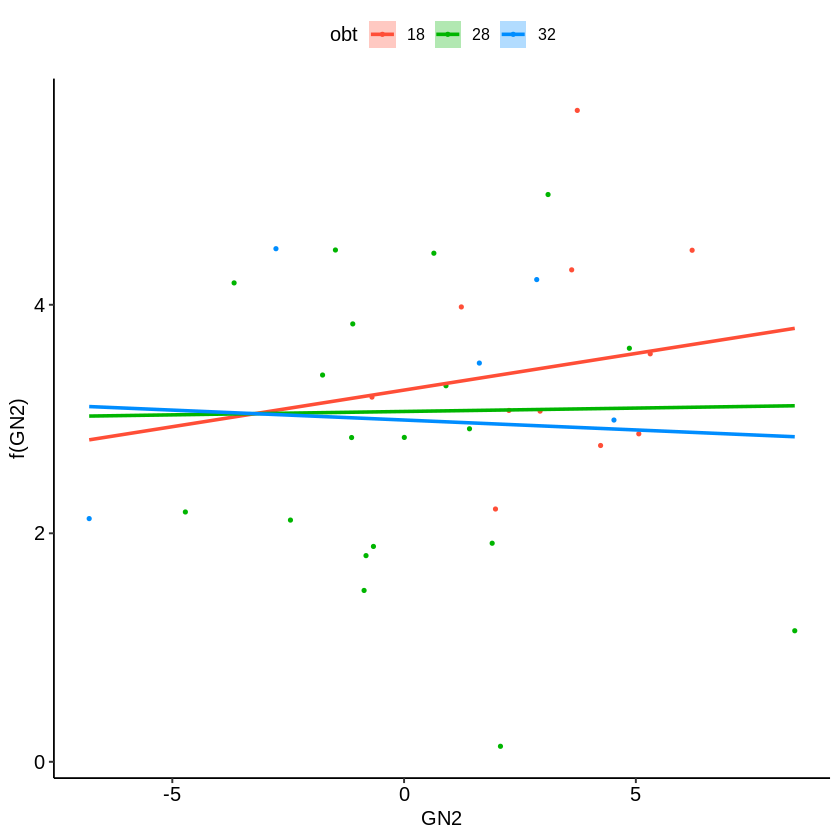

In [61]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34, 32), ]

beta_malt <- betareg(fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [62]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GN2:obt < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GN2 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 35) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.43      1.75    -1.99     4.91 1.00    18992    21270
GN2           0.21      0.22    -0.21     0.65 1.00    11327    16332
obt          -0.02      0.04    -0.09     0.05 1.00    13339    18323
aat           0.03      0.03    -0.03     0.09 1.00    15617    19798
dbt          -0.01      0.02    -0.06     0.03 1.00    19695    20810
nrt           0.02      0.04    -0.05     0.09 1.00    23322    21771
njt           0.02      0.03    -0.03     0.07 1.00    18182    19802
stai          0.02      0.02    -0.01     0.05 1.00    18207    19052
GN2:obt      -0.01      0.01    -0.02     0.01 1.00    11591    16720

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GN2) > 0     0.21      0.22    -0.14     0.58       5.04      0.83     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.02      0.04    -0.07     0.04       2.02      0.67     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GN2:obt) < 0    -0.01      0.01    -0.02        0       4.99      0.83     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta N2 * Acting with Awareness and no-Go Accuracy


Call:
betareg(formula = fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.504 -0.858 -0.243  0.847  2.805 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  2.32e+00   1.84e+00    1.26     0.21  
dN2          2.85e-01   1.79e-01    1.59     0.11  
aat         -4.36e-02   3.64e-02   -1.20     0.23  
obt         -8.94e-05   2.17e-02    0.00     1.00  
dbt          1.94e-02   1.75e-02    1.11     0.27  
nrt         -3.52e-02   3.23e-02   -1.09     0.28  
njt         -1.47e-02   2.14e-02   -0.69     0.49  
stai         6.24e-04   1.40e-02    0.04     0.96  
dN2:aat     -1.11e-02   6.36e-03   -1.75     0.08 .

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    11.28       2.53    4.46  8.1e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Typ

named integer(0)

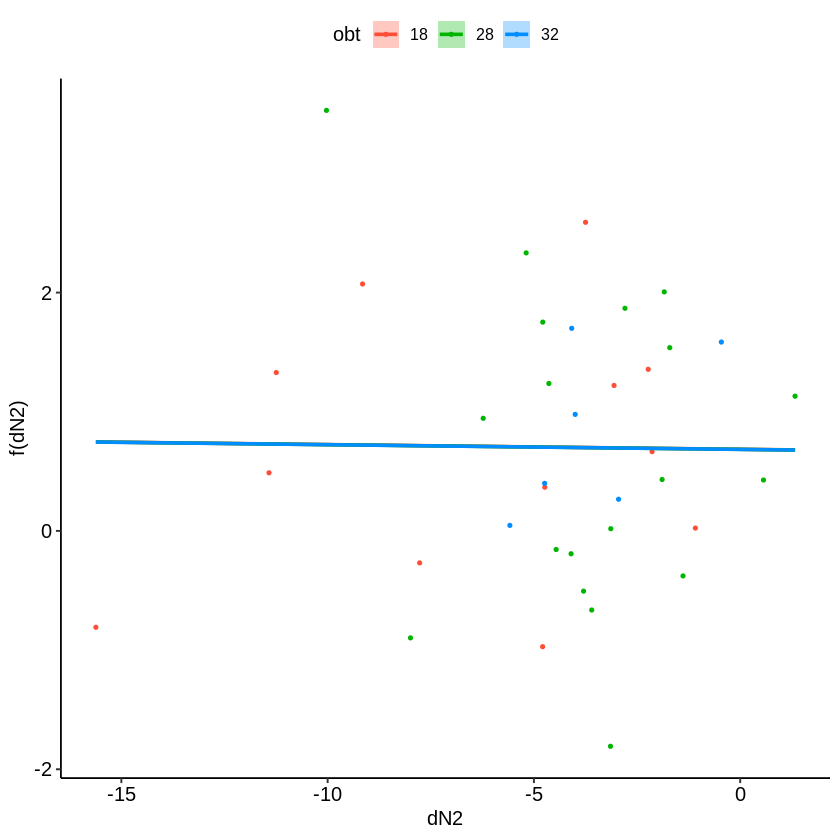

In [63]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "dN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [64]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dN2:aat < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dN2 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     2.24      2.06    -1.79     6.36 1.00    17366    19491
dN2           0.28      0.21    -0.13     0.69 1.00    13459    17700
aat          -0.04      0.04    -0.12     0.04 1.00    15365    18861
obt          -0.00      0.03    -0.05     0.05 1.00    27614    21473
dbt           0.02      0.02    -0.02     0.06 1.00    27228    22863
nrt          -0.03      0.04    -0.11     0.04 1.00    25241    22100
njt          -0.01      0.03    -0.06     0.04 1.00    21364    20093
stai          0.00      0.02    -0.03     0.03 1.00    21439    21631
dN2:aat      -0.01      0.01    -0.03     0.00 1.00    13253    17207

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dN2) > 0     0.28      0.21    -0.07     0.62       10.3      0.91     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.04      0.04    -0.11     0.03       5.14      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dN2:aat) < 0    -0.01      0.01    -0.02        0         13      0.93     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go N2 * Acting with Awareness and Go Accuracy

[1] 2.36 2.18

integer(0)

integer(0)

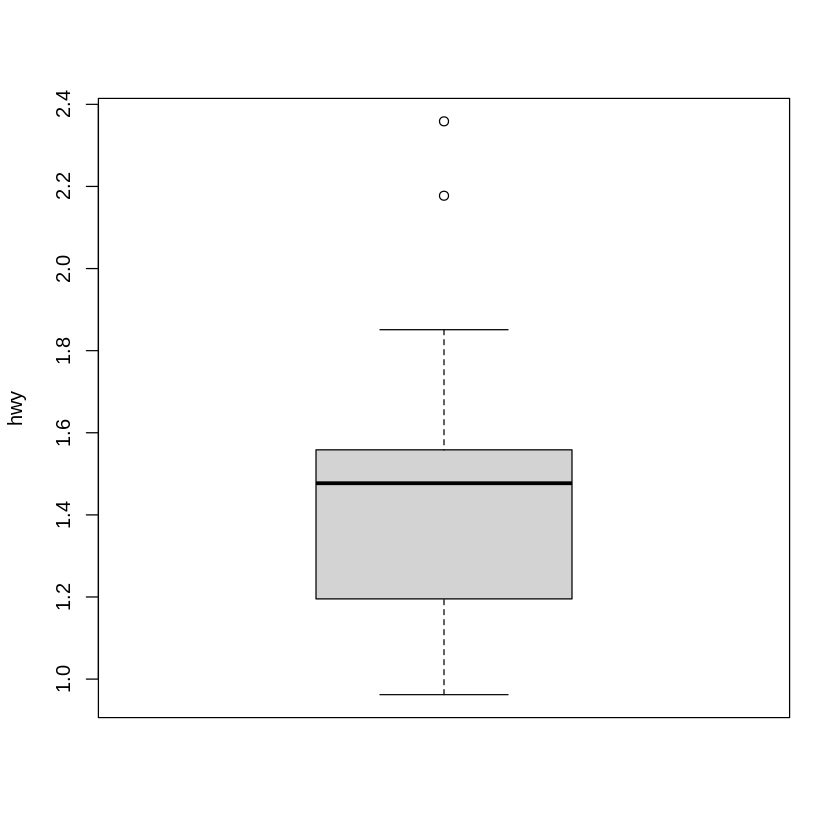

In [65]:
x = c(1.5494,1.1711,1.2336,0.96207,1.1916,1.5541,1.2035,1.6427,1.1953,1.5076,1.5555,1.4771,1.3947,1.4975,1.0168,1.2477,1.8202,1.2525,1.1662,1.432,2.3586,1.6469,1.5409,1.1608,1.1185,1.851,1.1779,1.5511,1.5584,1.4907,1.6004,1.0999,1.7139,1.7259,1.2316,2.1774,1.4657)

boxplot(x,
  ylab = "hwy"
)

boxplot.stats(x)$out

z <- scale(x)
which(z > 3.29)
which(z < -3.29)


Call:
betareg(formula = fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.665 -0.844 -0.180  0.790  1.972 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.279660   1.265461    1.01  0.31191    
GN2         -0.011147   0.090476   -0.12  0.90194    
aat          0.063463   0.017618    3.60  0.00032 ***
obt         -0.052228   0.019457   -2.68  0.00727 ** 
dbt          0.005185   0.016161    0.32  0.74832    
nrt         -0.004644   0.027377   -0.17  0.86528    
njt          0.009547   0.017412    0.55  0.58348    
stai         0.028514   0.011450    2.49  0.01277 *  
GN2:aat      0.000556   0.003794    0.15  0.88350    

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     90.4       21.5    4.21  2.5e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 

36 
36

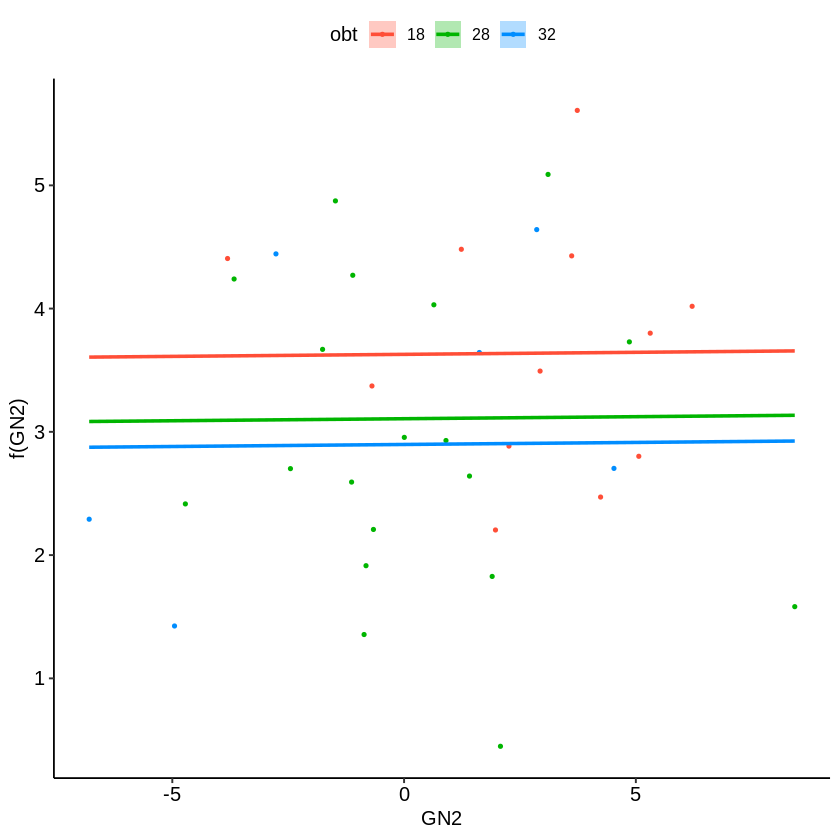

In [66]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GN2", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [67]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GN2 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GN2:aat < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GN2 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.39      1.52    -1.55     4.39 1.00    25492    22450
GN2          -0.00      0.11    -0.21     0.21 1.00    20164    21052
aat           0.06      0.02     0.01     0.11 1.00    26118    22255
obt          -0.05      0.02    -0.10    -0.01 1.00    28299    22082
dbt           0.00      0.02    -0.03     0.04 1.00    26614    22667
nrt          -0.00      0.03    -0.06     0.07 1.00    27564    22381
njt           0.01      0.02    -0.03     0.06 1.00    25878    21695
stai          0.03      0.01    -0.00     0.05 1.00    23384    20108
GN2:aat       0.00      0.00    -0.01     0.01 1.00    20563    21106

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GN2) > 0        0      0.11    -0.17     0.17       0.95      0.49     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.06      0.02     0.02      0.1        165      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GN2:aat) < 0        0         0    -0.01     0.01       0.89      0.47     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [68]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
#df <- df[-c(32, 34), ]

beta_malt <- betareg(fgc ~ dN2, data = df, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "GN2", overlay = TRUE, gg = TRUE) + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)
avg_slopes(beta_malt, variables = "GN2")


Call:
betareg(formula = fgc ~ dN2, data = df, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.289 -0.739  0.092  0.656  1.731 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.8829     0.1585   18.19   <2e-16 ***
dN2          -0.0482     0.0295   -1.63      0.1    

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     59.3       14.2    4.18  2.9e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 87.1 on 3 Df
Pseudo R-squared: 0.076
Number of iterations: 36 (BFGS) + 4 (Fisher scoring) 

ERROR: Error: GN2 not in model


In [ ]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ dN2),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dN2 > 0")

---